In [148]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the IMDB-WIKI dataset

Get the image metadata here: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

Get the pairwise comparison data here: https://github.com/Toloka/IMDB-WIKI-SbS

In [135]:
# Load MATLAB files
wiki = scipy.io.loadmat('./data/imdb-wiki/wiki.mat')
imdb = scipy.io.loadmat('./data/imdb-wiki/imdb.mat')
wiki

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
               dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                 array(['Dettmar Cramer'], dtype='<U14'),
                 array(['Marc Okrand'], dtype='<U11'), ...,
                 arr

In [235]:
# Extract people's names and photos taken
names_wiki = wiki['wiki']['name'][0][0][0]
names_imdb = imdb['imdb']['name'][0][0][0]
photo_taken_wiki = wiki['wiki']['photo_taken'][0][0][0]
photo_taken_imdb = imdb['imdb']['photo_taken'][0][0][0]
names_wiki = np.array([names[0] if len(names)>0 else '' for names in names_wiki])
names_imdb = np.array([names[0] if len(names)>0 else '' for names in names_imdb])
names_wiki

array(['Sami Jauhojärvi', 'Dettmar Cramer', 'Marc Okrand', ...,
       'Michael Wiesinger', 'Johann Grugger', 'Greta Van Susteren'],
      dtype='<U70')

In [236]:
# Extract file paths
full_path_wiki = wiki['wiki']['full_path'][0][0][0]
full_path_imdb = imdb['imdb']['full_path'][0][0][0]
full_path_wiki

array([array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
       array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
       array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
       array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
       array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
       array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')],
      dtype=object)

In [180]:
for i, entry in enumerate(full_path_imdb):
    if entry[0].split('/')[1] == 'nm0000323_rm3114703104_1933-3-14_2003.jpg':
        print(i, entry)

46309 ['23/nm0000323_rm3114703104_1933-3-14_2003.jpg']


In [237]:
# Only keep the file names
filename_wiki = np.array(list(map(lambda x:x.split('/')[1], np.stack(full_path_wiki).flatten())))
filename_imdb = np.array(list(map(lambda x:x.split('/')[1], np.stack(full_path_imdb).flatten())))
filename_wiki

array(['10000217_1981-05-05_2009.jpg', '10000548_1925-04-04_1964.jpg',
       '100012_1948-07-03_2008.jpg', ..., '9998109_1972-12-27_2013.jpg',
       '9999400_1981-12-13_2011.jpg', '999980_1954-06-11_2008.jpg'],
      dtype='<U34')

In [238]:
# Get the genders
gender_wiki = wiki['wiki']['gender'][0][0][0]
gender_imdb = imdb['imdb']['gender'][0][0][0]
gender_imdb

array([1., 1., 1., ..., 0., 0., 0.])

In [239]:
# Convert to DataFrames and concat
imdb_df = pd.DataFrame({'filename': filename_imdb, 'gender': gender_imdb, 'name': names_imdb, 'photo taken': photo_taken_imdb, 'dataset':'imdb'})
wiki_df = pd.DataFrame({'filename': filename_wiki, 'gender': gender_wiki, 'name': names_wiki, 'photo taken': photo_taken_wiki, 'dataset':'wiki'})
gender_df = pd.concat([imdb_df, wiki_df]).reset_index(drop=True)
gender_df

,filename,gender,name,photo taken,dataset
0,nm0000001_rm124825600_1899-5-10_1968.jpg,1.0,Fred Astaire,1968,imdb
1,nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0,Fred Astaire,1970,imdb
2,nm0000001_rm577153792_1899-5-10_1968.jpg,1.0,Fred Astaire,1968,imdb
3,nm0000001_rm946909184_1899-5-10_1968.jpg,1.0,Fred Astaire,1968,imdb
4,nm0000001_rm980463616_1899-5-10_1968.jpg,1.0,Fred Astaire,1968,imdb
...,...,...,...,...,...
523046,9996949_1937-04-17_1963.jpg,1.0,Guus Haak,1963,wiki
523047,9997032_1947-07-30_1970.jpg,1.0,Nico Rijnders,1970,wiki
523048,9998109_1972-12-27_2013.jpg,1.0,Michael Wiesinger,2013,wiki
523049,9999400_1981-12-13_2011.jpg,1.0,Johann Grugger,2011,wiki


In [240]:
# Get the ground-truth ages
gt_df = pd.read_csv('./data/imdb-wiki/gt.csv')
gt_df['filename'] = gt_df['label'].apply(lambda x: x.split('/')[-1])
gt_df = gt_df.rename({'score': 'age'}, axis=1)
gt_df

,label,age,filename
0,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm1442940_rm3965098752_1996-10-3_2006.jpg
1,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm4832920_rm1781768448_2003-8-28_2013.jpg
2,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm0652089_rm860657920_1992-3-10_2002.jpg
3,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm0004917_rm1493730304_1969-5-12_1979.jpg
4,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm1113550_rm1332711936_1996-4-14_2006.jpg
...,...,...,...
9145,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,475367_1941-08-03_2011.jpg
9146,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,304085_1919-07-07_1989.jpg
9147,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,nm0001627_rm4164078592_1927-2-20_1997.jpg
9148,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,nm0000024_rm1715129344_1904-4-14_1974.jpg


In [241]:
# merge ground-truth on on 'filename' column
df = pd.merge(gt_df[['age', 'filename']], gender_df[['filename', 'gender', 'name', 'photo taken', 'dataset']], on='filename', how='left')
df['gender'] = df['gender'].astype(int)
df

,age,filename,gender,name,photo taken,dataset
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0,Adair Tishler,2006,imdb
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0,Quvenzhané Wallis,2013,imdb
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0,Emily Osment,2002,imdb
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0,Kim Fields,1979,imdb
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0,Abigail Breslin,2006,imdb
...,...,...,...,...,...,...
9145,70,475367_1941-08-03_2011.jpg,1,Robert Thurman,2011,wiki
9146,70,304085_1919-07-07_1989.jpg,1,William Kunstler,1989,wiki
9147,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1,Sidney Poitier,1997,imdb
9148,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1,John Gielgud,1974,imdb


In [242]:
# Import the pairwise comparisons
pairwise_df = pd.read_csv('./data/imdb-wiki/crowd_labels.csv')
pairwise_df['left']  = pairwise_df['left'].apply(lambda x: x.split('/')[-1])
pairwise_df['right'] = pairwise_df['right'].apply(lambda x: x.split('/')[-1])
pairwise_df['label'] = pairwise_df['label'].apply(lambda x: x.split('/')[-1])
pairwise_df

,left,right,label,performer
0,26147732_1991-07-22_2015.jpg,nm0707728_rm4048061440_1935-1-2_1966.jpg,nm0707728_rm4048061440_1935-1-2_1966.jpg,0
1,nm0000072_rm2497944320_1932-2-27_1985.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,nm0000072_rm2497944320_1932-2-27_1985.jpg,0
2,nm0788370_rm2989144320_1971-4-11_1999.jpg,nm0726180_rm2487589632_1981-1-1_2005.jpg,nm0788370_rm2989144320_1971-4-11_1999.jpg,0
3,nm0325390_rm3409478912_1951-10-19_1979.jpg,1094676_1944-12-08_2011.jpg,1094676_1944-12-08_2011.jpg,1
4,1780768_1927-01-22_1963.jpg,nm0000442_rm1571854336_1944-1-23_2005.jpg,nm0000442_rm1571854336_1944-1-23_2005.jpg,1
...,...,...,...,...
250244,nm0000943_rm2478151680_1968-1-13_1999.jpg,nm0000825_rm1298385920_1952-10-7_1962.jpg,nm0000825_rm1298385920_1952-10-7_1962.jpg,3885
250245,26835279_1938-12-27_2004.jpg,nm0771493_rm519611392_1955-5-27_2013.jpg,26835279_1938-12-27_2004.jpg,3885
250246,2723_1964-05-27_2007.jpg,nm0858969_rm53517056_1990-1-30_2001.jpg,2723_1964-05-27_2007.jpg,4090
250247,nm0177396_rm3601370112_1987-9-15_2010.jpg,nm0005391_rm3942707712_1963-3-10_2015.jpg,nm0005391_rm3942707712_1963-3-10_2015.jpg,4090


In [245]:
# replace the values in df2 with their corresponding index in df1
pairwise_df['left']  = pairwise_df['left'].apply(lambda x:  df[df['filename']==x].index[0])
pairwise_df['right'] = pairwise_df['right'].apply(lambda x: df[df['filename']==x].index[0])
pairwise_df['label'] = pairwise_df['label'].apply(lambda x: df[df['filename']==x].index[0])
pairwise_df

,left,right,label,performer
0,2229,3164,3164,0
1,6505,5302,6505,0
2,2822,2139,2822,0
3,2757,8593,8593,1
4,3991,7792,7792,1
...,...,...,...,...
250244,3209,7,7,3885
250245,8533,7276,8533,3885
250246,5025,228,5025,4090
250247,2059,6425,6425,4090


In [246]:
pairwise_df.to_csv('./data/imdb-wiki/comparisons_cleaned.csv', index=False)
df.to_csv('./data/imdb-wiki/ground_truth_cleaned.csv', index=True)

## Additional annotations

### DeepFace

In [ ]:
gt_df['label'].to_csv('./data/imdb-wiki/gt_image_urls.csv', index=False, header=False)

…download the pictures with wget…

…annotate the pictures with DeepFace (GPU + batch processing enabled) …

In [116]:
stats_df = pd.DataFrame()
for i in range(92):
    tmp_df = pd.read_csv(f'./data/annotated_results_SbS_dataset/annotated_pictures_{i*100}.csv')
    stats_df = pd.concat([stats_df, tmp_df])
stats_df.reset_index(drop=True, inplace=True)
stats_df['filename'] = stats_df['img_path'].apply(lambda x: x.split('/')[-1])
stats_df['gender'] = stats_df[['Woman', 'Man']].idxmax(axis='columns')
stats_df['race'] = stats_df[['asian', 'indian', 'black', 'white', 'middle eastern', 'latino hispanic']].idxmax(axis='columns')
stats_df['age'] = stats_df[[str(i) for i in range(101)]].idxmax(axis='columns')
stats_df.head(5)

,img_path,img_region,confidence,Woman,Man,asian,indian,black,white,middle eastern,...,95,96,97,98,99,100,filename,gender,race,age
0,./data/pairwise_pictures/nm1442940_rm396509875...,"{'x': 37, 'y': 32, 'w': 68, 'h': 68}",8.944261,0.999998,1.992258e-06,6.712709e-08,2.154894e-08,2.317176e-11,9.994391e-01,3.144174e-04,...,2.318437e-26,1.537810e-25,2.298066e-22,4.601678e-18,1.058574e-20,1.177248e-22,nm1442940_rm3965098752_1996-10-3_2006.jpg,Woman,white,29
1,./data/pairwise_pictures/nm4832920_rm178176844...,"{'x': 130, 'y': 93, 'w': 267, 'h': 267}",7.807059,0.006351,9.936494e-01,1.131575e-13,3.097121e-10,1.000000e+00,9.185442e-17,1.897939e-18,...,5.070282e-20,7.929017e-19,1.474251e-16,2.811107e-14,1.228854e-16,1.221402e-20,nm4832920_rm1781768448_2003-8-28_2013.jpg,Man,black,20
2,./data/pairwise_pictures/nm0652089_rm860657920...,"{'x': 21, 'y': 23, 'w': 87, 'h': 87}",6.805956,0.016207,9.837928e-01,4.315005e-01,3.876365e-02,6.103022e-02,2.562613e-01,7.980810e-02,...,6.775297e-17,2.326861e-16,1.465573e-15,6.480504e-13,1.292861e-14,1.903800e-16,nm0652089_rm860657920_1992-3-10_2002.jpg,Man,asian,21
3,./data/pairwise_pictures/nm0004917_rm149373030...,"{'x': 130, 'y': 94, 'w': 275, 'h': 275}",7.320765,0.998937,1.063530e-03,3.227220e-01,1.179479e-01,7.288104e-02,1.708888e-01,1.238024e-01,...,3.020715e-31,6.157650e-28,3.364378e-24,5.999658e-19,3.861670e-22,8.914971e-21,nm0004917_rm1493730304_1969-5-12_1979.jpg,Woman,asian,36
4,./data/pairwise_pictures/nm1113550_rm133271193...,"{'x': 54, 'y': 47, 'w': 112, 'h': 112}",10.668577,0.999999,6.452609e-07,2.400677e-03,2.659190e-03,1.000963e-04,7.371253e-01,7.197516e-02,...,4.419830e-32,2.441471e-29,8.398209e-26,6.494655e-20,4.173040e-23,1.571473e-23,nm1113550_rm1332711936_1996-4-14_2006.jpg,Woman,white,31


In [117]:
# weighted sum of columns: https://stackoverflow.com/a/53980559

weights = {str(i):i for i in range(101)}
stats_df['weighted_age_deepface'] = stats_df[[str(i) for i in range(101)]].dot(pd.Series(weights).reindex([str(i) for i in range(101)], fill_value=0))

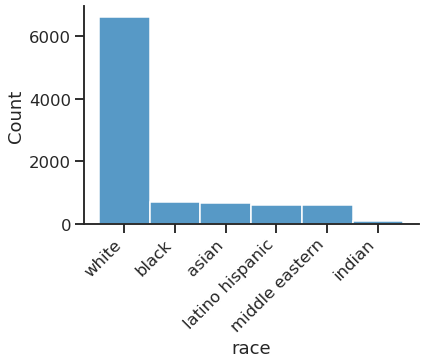

In [109]:
# ethnicity statistics
ax = sns.histplot(stats_df, x='race')
plt.xticks(rotation=45, ha='right')
sns.despine()

In [ ]:
stats_df.to_csv('./data/imdb-wiki/deepface_annotations.csv')

In [42]:
df

,age,filename,gender
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0
...,...,...,...
9145,70,475367_1941-08-03_2011.jpg,1
9146,70,304085_1919-07-07_1989.jpg,1
9147,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1
9148,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1


In [118]:
stats_df = stats_df.drop_duplicates(subset=['filename'])

In [119]:
# add to ground truth data
df_annotated = pd.merge(how='outer', left=df, right=stats_df[['gender', 'age', 'filename', 'race', 'weighted_age_deepface']], suffixes=('', '_deepface'), left_on='filename', right_on='filename')
df_annotated = df_annotated.rename(columns={'race': 'race_deepface'})
df_annotated

,age,filename,gender,name,photo taken,dataset,gender_deepface,age_deepface,race_deepface,weighted_age_deepface
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0,Adair Tishler,2006,imdb,Woman,29,white,27.542897
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0,Quvenzhané Wallis,2013,imdb,Man,20,black,22.001092
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0,Emily Osment,2002,imdb,Man,21,asian,24.205546
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0,Kim Fields,1979,imdb,Woman,36,asian,32.919495
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0,Abigail Breslin,2006,imdb,Woman,31,white,31.132969
...,...,...,...,...,...,...,...,...,...,...
9145,70,475367_1941-08-03_2011.jpg,1,Robert Thurman,2011,wiki,Man,25,asian,27.783502
9146,70,304085_1919-07-07_1989.jpg,1,William Kunstler,1989,wiki,Man,44,middle eastern,42.484900
9147,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1,Sidney Poitier,1997,imdb,Man,43,white,40.944005
9148,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1,John Gielgud,1974,imdb,Woman,44,white,43.594910


In [120]:
df_annotated.to_csv('./data/imdb-wiki/ground_truth_annotated.csv')

### FairFace

In [3]:
df = pd.read_csv('./data/imdb-wiki/ground_truth_cleaned.csv', index_col=0)
df

,age,filename,gender,name,photo taken,dataset
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0,Adair Tishler,2006,imdb
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0,Quvenzhané Wallis,2013,imdb
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0,Emily Osment,2002,imdb
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0,Kim Fields,1979,imdb
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0,Abigail Breslin,2006,imdb
...,...,...,...,...,...,...
9145,70,475367_1941-08-03_2011.jpg,1,Robert Thurman,2011,wiki
9146,70,304085_1919-07-07_1989.jpg,1,William Kunstler,1989,wiki
9147,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1,Sidney Poitier,1997,imdb
9148,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1,John Gielgud,1974,imdb


In [4]:
df['img_path'] = '../fairpair/data/pairwise_pictures/' + df['filename']
df[['img_path']].to_csv('./data/imdb-wiki/fairface-images.csv', index=False)

In [52]:
df_fairface = pd.read_csv('./data/imdb-wiki/fairface_outputs.csv')
df_fairface

,face_name_align,race,race4,gender,age,race_scores_fair,race_scores_fair_4,gender_scores_fair,age_scores_fair
0,detected_faces/nm0004875_rm2099892736_1971-1-2...,Black,Black,Male,30-39,[1.3767012e-03 9.7738379e-01 1.5834620e-02 2.8...,[1.8760886e-03 9.9461752e-01 5.2504760e-04 2.9...,[1.0000000e+00 4.6078643e-09],[1.5745989e-05 1.2960448e-04 2.1399984e-03 1.6...
1,detected_faces/2285380_1918-11-03_1967_face0.jpg,White,White,Female,10-19,[9.9381393e-01 4.7736371e-06 6.4001308e-04 1.3...,[9.9994862e-01 2.2507300e-05 1.0528800e-05 1.8...,[0.20396237 0.7960376 ],[0.00064736 0.06182926 0.3015691 0.1269237 0...
2,detected_faces/nm0005475_rm4193229056_1969-6-8...,White,White,Male,30-39,[9.8958951e-01 1.0920738e-05 6.0327761e-03 2.3...,[9.9914795e-01 1.1423536e-04 5.9241200e-05 6.7...,[9.9999529e-01 4.7022036e-06],[2.4283247e-05 4.0136240e-04 3.3821058e-03 4.6...
3,detected_faces/8024985_1948-05-20_2009_face0.jpg,White,White,Male,50-59,[9.4038790e-01 5.4728840e-05 2.4273789e-02 5.5...,[9.9507248e-01 1.6926942e-05 4.1537215e-03 7.5...,[0.98433614 0.01566382],[8.6343589e-06 8.7866265e-06 9.9833225e-05 1.2...
4,detected_faces/15600639_1947-03-19_1972_face0.jpg,White,White,Female,20-29,[8.9267021e-01 3.0709661e-03 5.4530244e-02 6.4...,[9.978416e-01 9.972366e-04 2.405811e-04 9.2057...,[0.00358532 0.99641466],[3.9503293e-06 1.5378097e-04 1.4241746e-02 4.7...
...,...,...,...,...,...,...,...,...,...
9517,detected_faces/nm0000542_rm1472125184_1964-1-1...,White,White,Female,30-39,[9.9995947e-01 1.2990797e-07 1.3966332e-05 2.2...,[9.9997294e-01 1.3116869e-05 6.1746750e-06 7.7...,[1.4727152e-05 9.9998528e-01],[8.4086508e-08 9.8320797e-06 2.0898781e-03 2.9...
9518,detected_faces/565372_1947-08-05_2006_face0.jpg,White,White,Male,40-49,[0.71234715 0.00818671 0.02428473 0.03916997 0...,[0.8338663 0.01268323 0.15233117 0.00111929],[0.96932036 0.03067969],[0.00108891 0.00295891 0.00387053 0.04298208 0...
9519,detected_faces/nm1032795_rm1798544128_1987-9-9...,Middle Eastern,White,Male,10-19,[2.6578352e-01 1.3436982e-04 8.5808104e-03 8.0...,[9.9921960e-01 1.1512733e-04 4.6008146e-05 6.1...,[9.9997598e-01 2.3996135e-05],[3.5073631e-07 1.3149385e-03 5.8338225e-01 4.0...
9520,detected_faces/nm0005142_rm592812288_1954-12-2...,White,White,Female,30-39,[6.9812149e-01 8.6067501e-04 9.9900430e-03 3.5...,[9.7722310e-01 8.6430256e-04 2.1904353e-02 8.2...,[0.06451228 0.93548775],[1.8804711e-05 4.5887491e-04 3.6237442e-03 9.7...


In [53]:
df_fairface.iloc[0].face_name_align

'detected_faces/nm0004875_rm2099892736_1971-1-2_2013_face0.jpg'

In [54]:
df_fairface['filename'] = ['_'.join(face.split('/')[1].split('_')[:-1]) + '.jpg' for face in df_fairface.face_name_align]

In [55]:
df_fairface

,face_name_align,race,race4,gender,age,race_scores_fair,race_scores_fair_4,gender_scores_fair,age_scores_fair,filename
0,detected_faces/nm0004875_rm2099892736_1971-1-2...,Black,Black,Male,30-39,[1.3767012e-03 9.7738379e-01 1.5834620e-02 2.8...,[1.8760886e-03 9.9461752e-01 5.2504760e-04 2.9...,[1.0000000e+00 4.6078643e-09],[1.5745989e-05 1.2960448e-04 2.1399984e-03 1.6...,nm0004875_rm2099892736_1971-1-2_2013.jpg
1,detected_faces/2285380_1918-11-03_1967_face0.jpg,White,White,Female,10-19,[9.9381393e-01 4.7736371e-06 6.4001308e-04 1.3...,[9.9994862e-01 2.2507300e-05 1.0528800e-05 1.8...,[0.20396237 0.7960376 ],[0.00064736 0.06182926 0.3015691 0.1269237 0...,2285380_1918-11-03_1967.jpg
2,detected_faces/nm0005475_rm4193229056_1969-6-8...,White,White,Male,30-39,[9.8958951e-01 1.0920738e-05 6.0327761e-03 2.3...,[9.9914795e-01 1.1423536e-04 5.9241200e-05 6.7...,[9.9999529e-01 4.7022036e-06],[2.4283247e-05 4.0136240e-04 3.3821058e-03 4.6...,nm0005475_rm4193229056_1969-6-8_2000.jpg
3,detected_faces/8024985_1948-05-20_2009_face0.jpg,White,White,Male,50-59,[9.4038790e-01 5.4728840e-05 2.4273789e-02 5.5...,[9.9507248e-01 1.6926942e-05 4.1537215e-03 7.5...,[0.98433614 0.01566382],[8.6343589e-06 8.7866265e-06 9.9833225e-05 1.2...,8024985_1948-05-20_2009.jpg
4,detected_faces/15600639_1947-03-19_1972_face0.jpg,White,White,Female,20-29,[8.9267021e-01 3.0709661e-03 5.4530244e-02 6.4...,[9.978416e-01 9.972366e-04 2.405811e-04 9.2057...,[0.00358532 0.99641466],[3.9503293e-06 1.5378097e-04 1.4241746e-02 4.7...,15600639_1947-03-19_1972.jpg
...,...,...,...,...,...,...,...,...,...,...
9517,detected_faces/nm0000542_rm1472125184_1964-1-1...,White,White,Female,30-39,[9.9995947e-01 1.2990797e-07 1.3966332e-05 2.2...,[9.9997294e-01 1.3116869e-05 6.1746750e-06 7.7...,[1.4727152e-05 9.9998528e-01],[8.4086508e-08 9.8320797e-06 2.0898781e-03 2.9...,nm0000542_rm1472125184_1964-1-13_2013.jpg
9518,detected_faces/565372_1947-08-05_2006_face0.jpg,White,White,Male,40-49,[0.71234715 0.00818671 0.02428473 0.03916997 0...,[0.8338663 0.01268323 0.15233117 0.00111929],[0.96932036 0.03067969],[0.00108891 0.00295891 0.00387053 0.04298208 0...,565372_1947-08-05_2006.jpg
9519,detected_faces/nm1032795_rm1798544128_1987-9-9...,Middle Eastern,White,Male,10-19,[2.6578352e-01 1.3436982e-04 8.5808104e-03 8.0...,[9.9921960e-01 1.1512733e-04 4.6008146e-05 6.1...,[9.9997598e-01 2.3996135e-05],[3.5073631e-07 1.3149385e-03 5.8338225e-01 4.0...,nm1032795_rm1798544128_1987-9-9_2003.jpg
9520,detected_faces/nm0005142_rm592812288_1954-12-2...,White,White,Female,30-39,[6.9812149e-01 8.6067501e-04 9.9900430e-03 3.5...,[9.7722310e-01 8.6430256e-04 2.1904353e-02 8.2...,[0.06451228 0.93548775],[1.8804711e-05 4.5887491e-04 3.6237442e-03 9.7...,nm0005142_rm592812288_1954-12-25_2007.jpg


In [56]:
df_fairface.age.unique()

array(['30-39', '10-19', '50-59', '20-29', '60-69', '70+', '40-49', '3-9',
       '0-2'], dtype=object)

In [58]:
df_fairface_first = df_fairface.drop_duplicates(subset='filename').copy()
#df_fairface_first['age_fairface'] = [int(age_range.split('-')[0].split('+')[0]) + 5 for age_range in df_fairface_first['age']]
df_fairface_first['age_fairface_lower'] = [int(age_range.split('-')[0].split('+')[0]) for age_range in df_fairface_first['age']]
df_fairface_first['age_fairface_upper'] = [int(age_range.split('-')[1]) if len (age_range.split('-'))==2 else 80 for age_range in df_fairface_first['age']]
df_fairface_first['age_fairface'] = (df_fairface_first['age_fairface_lower'] + df_fairface_first['age_fairface_upper'])/2
df_fairface_first

,face_name_align,race,race4,gender,age,race_scores_fair,race_scores_fair_4,gender_scores_fair,age_scores_fair,filename,age_fairface_lower,age_fairface_upper,age_fairface
0,detected_faces/nm0004875_rm2099892736_1971-1-2...,Black,Black,Male,30-39,[1.3767012e-03 9.7738379e-01 1.5834620e-02 2.8...,[1.8760886e-03 9.9461752e-01 5.2504760e-04 2.9...,[1.0000000e+00 4.6078643e-09],[1.5745989e-05 1.2960448e-04 2.1399984e-03 1.6...,nm0004875_rm2099892736_1971-1-2_2013.jpg,30,39,34.5
1,detected_faces/2285380_1918-11-03_1967_face0.jpg,White,White,Female,10-19,[9.9381393e-01 4.7736371e-06 6.4001308e-04 1.3...,[9.9994862e-01 2.2507300e-05 1.0528800e-05 1.8...,[0.20396237 0.7960376 ],[0.00064736 0.06182926 0.3015691 0.1269237 0...,2285380_1918-11-03_1967.jpg,10,19,14.5
2,detected_faces/nm0005475_rm4193229056_1969-6-8...,White,White,Male,30-39,[9.8958951e-01 1.0920738e-05 6.0327761e-03 2.3...,[9.9914795e-01 1.1423536e-04 5.9241200e-05 6.7...,[9.9999529e-01 4.7022036e-06],[2.4283247e-05 4.0136240e-04 3.3821058e-03 4.6...,nm0005475_rm4193229056_1969-6-8_2000.jpg,30,39,34.5
3,detected_faces/8024985_1948-05-20_2009_face0.jpg,White,White,Male,50-59,[9.4038790e-01 5.4728840e-05 2.4273789e-02 5.5...,[9.9507248e-01 1.6926942e-05 4.1537215e-03 7.5...,[0.98433614 0.01566382],[8.6343589e-06 8.7866265e-06 9.9833225e-05 1.2...,8024985_1948-05-20_2009.jpg,50,59,54.5
4,detected_faces/15600639_1947-03-19_1972_face0.jpg,White,White,Female,20-29,[8.9267021e-01 3.0709661e-03 5.4530244e-02 6.4...,[9.978416e-01 9.972366e-04 2.405811e-04 9.2057...,[0.00358532 0.99641466],[3.9503293e-06 1.5378097e-04 1.4241746e-02 4.7...,15600639_1947-03-19_1972.jpg,20,29,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9517,detected_faces/nm0000542_rm1472125184_1964-1-1...,White,White,Female,30-39,[9.9995947e-01 1.2990797e-07 1.3966332e-05 2.2...,[9.9997294e-01 1.3116869e-05 6.1746750e-06 7.7...,[1.4727152e-05 9.9998528e-01],[8.4086508e-08 9.8320797e-06 2.0898781e-03 2.9...,nm0000542_rm1472125184_1964-1-13_2013.jpg,30,39,34.5
9518,detected_faces/565372_1947-08-05_2006_face0.jpg,White,White,Male,40-49,[0.71234715 0.00818671 0.02428473 0.03916997 0...,[0.8338663 0.01268323 0.15233117 0.00111929],[0.96932036 0.03067969],[0.00108891 0.00295891 0.00387053 0.04298208 0...,565372_1947-08-05_2006.jpg,40,49,44.5
9519,detected_faces/nm1032795_rm1798544128_1987-9-9...,Middle Eastern,White,Male,10-19,[2.6578352e-01 1.3436982e-04 8.5808104e-03 8.0...,[9.9921960e-01 1.1512733e-04 4.6008146e-05 6.1...,[9.9997598e-01 2.3996135e-05],[3.5073631e-07 1.3149385e-03 5.8338225e-01 4.0...,nm1032795_rm1798544128_1987-9-9_2003.jpg,10,19,14.5
9520,detected_faces/nm0005142_rm592812288_1954-12-2...,White,White,Female,30-39,[6.9812149e-01 8.6067501e-04 9.9900430e-03 3.5...,[9.7722310e-01 8.6430256e-04 2.1904353e-02 8.2...,[0.06451228 0.93548775],[1.8804711e-05 4.5887491e-04 3.6237442e-03 9.7...,nm0005142_rm592812288_1954-12-25_2007.jpg,30,39,34.5


In [59]:
df_annotated = pd.read_csv('./data/imdb-wiki/ground_truth_annotated.csv', index_col=0)

In [60]:
df_fairface_first.rename(inplace=True, columns={'race': 'race_fairface', 'gender': 'gender_fairface'})
df_annotated = df_annotated.merge(right=df_fairface_first[['filename', 'age_fairface', 'gender_fairface', 'race_fairface', 'age_fairface_lower', 'age_fairface_upper']],
                                  left_on='filename', right_on='filename')
df_annotated

,age,filename,gender,name,photo taken,dataset,gender_deepface,age_deepface,race_deepface,weighted_age_deepface,age_fairface,gender_fairface,race_fairface,age_fairface_lower,age_fairface_upper
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0,Adair Tishler,2006,imdb,Woman,29,white,27.542897,6.0,Female,White,3,9
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0,Quvenzhané Wallis,2013,imdb,Man,20,black,22.001092,6.0,Female,Black,3,9
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0,Emily Osment,2002,imdb,Man,21,asian,24.205546,14.5,Female,White,10,19
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0,Kim Fields,1979,imdb,Woman,36,asian,32.919495,6.0,Female,Black,3,9
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0,Abigail Breslin,2006,imdb,Woman,31,white,31.132969,24.5,Female,White,20,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9126,70,475367_1941-08-03_2011.jpg,1,Robert Thurman,2011,wiki,Man,25,asian,27.783502,34.5,Male,East Asian,30,39
9127,70,304085_1919-07-07_1989.jpg,1,William Kunstler,1989,wiki,Man,44,middle eastern,42.484900,54.5,Male,Latino_Hispanic,50,59
9128,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1,Sidney Poitier,1997,imdb,Man,43,white,40.944005,54.5,Male,White,50,59
9129,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1,John Gielgud,1974,imdb,Woman,44,white,43.594910,34.5,Male,White,30,39


In [61]:
df_annotated.to_csv('./data/imdb-wiki/ground_truth_fairface.csv')

## Matching FairFace & Actors

In [228]:
pairwise_df = pd.read_csv('./data/imdb-wiki/comparisons_cleaned.csv')
df = pd.read_csv('./data/imdb-wiki/ground_truth_fairface.csv', index_col=0)
actors_df = pd.read_csv('./data/imdb-wiki/all_actors_from_imdb.csv')

#### Checking whether the method works by evaluating FairFace predictions with IMDB-WIKI labels on single face images

In [4]:
faces_counter = actors_df.groupby('filename').count()
single_face_images = pd.Series(faces_counter[faces_counter.name == 1].index)
single_face_images

0         nm0000002_rm238734336_1924-9-16_1974.jpg
1        nm0000002_rm4213815808_1924-9-16_1990.jpg
2        nm0000047_rm3937572864_1934-9-20_1998.jpg
3        nm0000072_rm2151386624_1932-2-27_1994.jpg
4        nm0000072_rm2497944320_1932-2-27_1985.jpg
                           ...                    
2902     nm5554445_rm1862194688_1999-3-19_2013.jpg
2903     nm5617092_rm2985423360_2000-5-16_2015.jpg
2904     nm5821197_rm2940008192_1997-6-20_2015.jpg
2905    nm5897535_rm4291229440_1999-10-18_2014.jpg
2906      nm6242651_rm370264320_1994-3-16_2014.jpg
Name: filename, Length: 2907, dtype: object

In [66]:
df

,age,filename,gender,name,photo taken,dataset,gender_deepface,age_deepface,race_deepface,weighted_age_deepface,age_fairface,gender_fairface,race_fairface,age_fairface_lower,age_fairface_upper
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0,Adair Tishler,2006,imdb,Woman,29,white,27.542897,6.0,Female,White,3,9
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0,Quvenzhané Wallis,2013,imdb,Man,20,black,22.001092,6.0,Female,Black,3,9
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0,Emily Osment,2002,imdb,Man,21,asian,24.205546,14.5,Female,White,10,19
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0,Kim Fields,1979,imdb,Woman,36,asian,32.919495,6.0,Female,Black,3,9
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0,Abigail Breslin,2006,imdb,Woman,31,white,31.132969,24.5,Female,White,20,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9126,70,475367_1941-08-03_2011.jpg,1,Robert Thurman,2011,wiki,Man,25,asian,27.783502,34.5,Male,East Asian,30,39
9127,70,304085_1919-07-07_1989.jpg,1,William Kunstler,1989,wiki,Man,44,middle eastern,42.484900,54.5,Male,Latino_Hispanic,50,59
9128,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1,Sidney Poitier,1997,imdb,Man,43,white,40.944005,54.5,Male,White,50,59
9129,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1,John Gielgud,1974,imdb,Woman,44,white,43.594910,34.5,Male,White,30,39


matching number of images (original annotation) by age range estimation overlap:
overlap 0: 2375/9131 images
overlap 1: 2886/9131 images
overlap 2: 3426/9131 images
overlap 3: 3877/9131 images
overlap 4: 4284/9131 images
overlap 5: 4616/9131 images
overlap 6: 4940/9131 images
overlap 7: 5251/9131 images
overlap 8: 5548/9131 images
overlap 9: 5777/9131 images


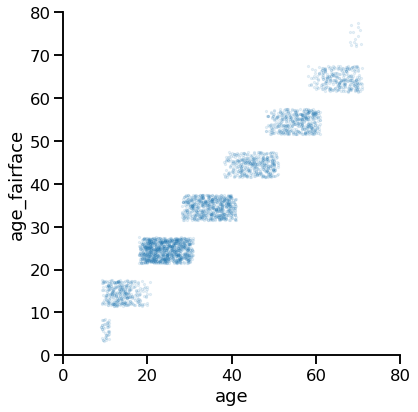

In [91]:
df2 = df.copy()
#df2.index = df2.filename
#df2 = df2.drop(columns=['filename']).merge(left_index=True, right=single_face_images, right_on='filename')
df2['gender_fairface'] = (df.gender_fairface == 'Male').astype(int)
df2['gender matches'] = df2['gender'] == df2['gender_fairface']
#df2['age_diff'] = abs(df2.age - df2.age_fairface)

print('matching number of images (original annotation) by age range estimation overlap:')
for overlap in range(10):
    print(f"overlap {overlap}: {len(df2[(df2.age > df2.age_fairface_lower - overlap) & (df2.age < df2.age_fairface_upper + overlap) & (df2['gender matches'])])}/{len(df2)} images")

overlap = 2
df3 = df2[(df2.age > df2.age_fairface_lower - overlap) & (df2.age < df2.age_fairface_upper + overlap) & (df2['gender matches'])]

sns.set_context("talk")
ax = sns.lmplot(df3, x='age', y='age_fairface', #hue='gender matches',
           scatter_kws={"s": 5, 'alpha': 0.1}, x_jitter=1, y_jitter=3, aspect=1, height=6, fit_reg=False)
ax.set(xlim=(0,80), ylim=(0,80))
plt.show()

#### Combining IMDB and Wikidata

In [47]:
wikidata_df = pd.read_csv('./data/imdb-wiki/wikidata_actors.csv', index_col=0)
wikidata_df['date of birth'] = pd.to_datetime(wikidata_df['date of birth'], errors='coerce')
wikidata_df['gender'] = wikidata_df['gender'].map({'female': 'Female', 'male': 'Male'})
wikidata_df.rename(columns={'gender': 'gender_wikidata', 'date of birth': 'dob_wikidata'}, inplace=True)
wikidata_df.drop(columns='name', inplace=True)
wikidata_df

,gender_wikidata,dob_wikidata,IMDB id
0,Female,1996-10-03 00:00:00+00:00,nm1442940
1,Female,2003-08-28 00:00:00+00:00,nm4832920
2,Female,1992-03-10 00:00:00+00:00,nm0652089
3,Female,1966-04-04 00:00:00+00:00,nm0001529
4,Female,1969-05-12 00:00:00+00:00,nm0004917
...,...,...,...
6646,Male,1944-08-07 00:00:00+00:00,nm0711058
6647,Female,1983-03-11 00:00:00+00:00,nm2192439
6648,Male,1904-04-14 00:00:00+00:00,nm0000024
6649,Male,1930-09-23 00:00:00+00:00,nm0086780


In [48]:
actors_df

,name,IMDB id,filename
0,Adair Tishler,nm1442940,nm1442940_rm3965098752_1996-10-3_2006.jpg
1,Quvenzhané Wallis,nm4832920,nm4832920_rm1781768448_2003-8-28_2013.jpg
2,Emily Osment,nm0652089,nm0652089_rm860657920_1992-3-10_2002.jpg
3,Nancy McKeon,nm0001529,nm0004917_rm1493730304_1969-5-12_1979.jpg
4,Kim Fields,nm0004917,nm0004917_rm1493730304_1969-5-12_1979.jpg
...,...,...,...
11980,George Coulouris,nm0183459,nm0000024_rm1715129344_1904-4-14_1974.jpg
11981,Wendy Hiller,nm0384908,nm0000024_rm1715129344_1904-4-14_1974.jpg
11982,Rachel Roberts,nm0731499,nm0000024_rm1715129344_1904-4-14_1974.jpg
11983,Michael Caine,nm0000323,nm0000323_rm3114703104_1933-3-14_2003.jpg


In [64]:
image_all_actors_df = actors_df.merge(right=wikidata_df, left_on='IMDB id', right_on='IMDB id')
image_all_actors_df['year of image'] = pd.to_datetime(image_all_actors_df.filename.apply(lambda fn: fn.split('_')[-1][0:4]), utc=True)
image_all_actors_df['age_wikidata'] = (image_all_actors_df['year of image'] - image_all_actors_df.dob_wikidata).dt.days // 365.25
image_all_actors_df

,name,IMDB id,filename,gender_wikidata,dob_wikidata,year of image,age_wikidata
0,Adair Tishler,nm1442940,nm1442940_rm3965098752_1996-10-3_2006.jpg,Female,1996-10-03 00:00:00+00:00,2006-01-01 00:00:00+00:00,9.0
1,Adair Tishler,nm1442940,nm1442940_rm1052479232_1996-10-3_2009.jpg,Female,1996-10-03 00:00:00+00:00,2009-01-01 00:00:00+00:00,12.0
2,Quvenzhané Wallis,nm4832920,nm4832920_rm1781768448_2003-8-28_2013.jpg,Female,2003-08-28 00:00:00+00:00,2013-01-01 00:00:00+00:00,9.0
3,Quvenzhané Wallis,nm4832920,nm4832920_rm2666266112_2003-8-28_2014.jpg,Female,2003-08-28 00:00:00+00:00,2014-01-01 00:00:00+00:00,10.0
4,Quvenzhané Wallis,nm4832920,nm4832920_rm3845521152_2003-8-28_2015.jpg,Female,2003-08-28 00:00:00+00:00,2015-01-01 00:00:00+00:00,11.0
...,...,...,...,...,...,...,...
11324,David Rasche,nm0711058,nm0711058_rm1383462656_1944-8-7_2014.jpg,Male,1944-08-07 00:00:00+00:00,2014-01-01 00:00:00+00:00,69.0
11325,Lucy DeVito,nm2192439,nm0000362_rm3534668800_1944-11-17_2014.jpg,Female,1983-03-11 00:00:00+00:00,2014-01-01 00:00:00+00:00,30.0
11326,John Gielgud,nm0000024,nm0000024_rm1715129344_1904-4-14_1974.jpg,Male,1904-04-14 00:00:00+00:00,1974-01-01 00:00:00+00:00,69.0
11327,Colin Blakely,nm0086780,nm0000024_rm1715129344_1904-4-14_1974.jpg,Male,1930-09-23 00:00:00+00:00,1974-01-01 00:00:00+00:00,43.0


#### Match all actors that are in the correct age range +-overlap

matching number of images (annotation enhanced with IMDB) by age range estimation overlap:
overlap 0: 2061/9131 images
  images with multiple matching actors: 284
overlap 1: 2548/9131 images
  images with multiple matching actors: 389
overlap 2: 2881/9131 images
  images with multiple matching actors: 513
overlap 3: 3207/9131 images
  images with multiple matching actors: 602
overlap 4: 3475/9131 images
  images with multiple matching actors: 724
overlap 5: 3732/9131 images
  images with multiple matching actors: 825
overlap 6: 3990/9131 images
  images with multiple matching actors: 930
overlap 7: 4226/9131 images
  images with multiple matching actors: 1036
overlap 8: 4417/9131 images
  images with multiple matching actors: 1169
overlap 9: 4582/9131 images
  images with multiple matching actors: 1273
overlap 10: 4713/9131 images
  images with multiple matching actors: 1361


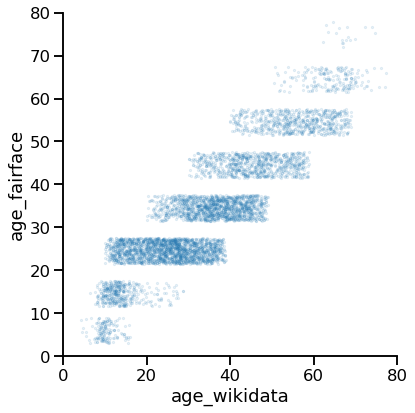

In [86]:
df4 = df.copy()
df4 = df4.merge(right=image_all_actors_df, left_on='filename', right_on='filename')  # using the crawled actors as alternative ground-truth labels for each image
#df4['gender_fairface'] = (df.gender_fairface == 'Male').astype(int)
df4['gender matches'] = df4['gender_wikidata'] == df4['gender_fairface']
#df2['age_diff'] = abs(df2.age - df2.age_fairface)

print('matching number of images (annotation enhanced with IMDB) by age range estimation overlap:')
for overlap in range(11):
    filtered_df = df4[(df4.age_wikidata > df4.age_fairface_lower - overlap) & (df4.age_wikidata < df4.age_fairface_upper + overlap) & (df4['gender matches'])]
    print(f"overlap {overlap}: {len(filtered_df.drop_duplicates(subset='filename'))}/{len(df2)} images")
    matching_actors = filtered_df.groupby('filename').count()['age']
    print(f"  images with multiple matching actors: {matching_actors.sum() - len(matching_actors)}")

overlap = 10
df5 = df4[(df4.age_wikidata > df4.age_fairface_lower - overlap) & (df4.age_wikidata < df4.age_fairface_upper + overlap) & (df4['gender matches'])]

sns.set_context("talk")
ax = sns.lmplot(df5, x='age_wikidata', y='age_fairface', #hue='gender matches',
           scatter_kws={"s": 5, 'alpha': 0.1}, x_jitter=1, y_jitter=3, aspect=1, height=6, fit_reg=False)
ax.set(xlim=(0,80), ylim=(0,80))
plt.show()

#### Always match the closest actor

matching number of images (annotation enhanced with IMDB) by age range estimation overlap, always taking the closest match:


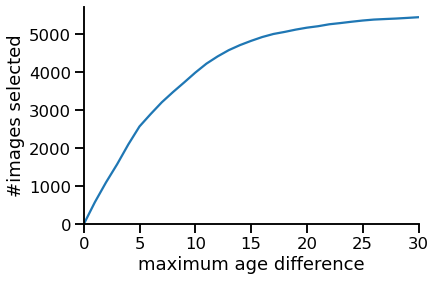

keeping 3990 closest images with age difference <10 years


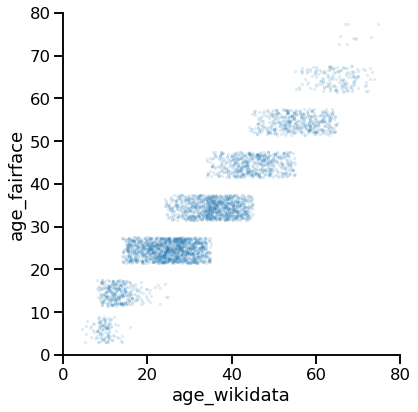

In [122]:
df6 = df.copy()
df6 = df6.merge(right=image_all_actors_df, left_on='filename', right_on='filename', suffixes=('', '_wikidata'))  # using the crawled actors as alternative ground-truth labels for each image
df6 = df6[df6['gender_wikidata'] == df6['gender_fairface']]  # keep only matching genders
df6['age_diff'] = abs(df6.age_wikidata - df6.age_fairface)
closest_match = df6.groupby('filename')['age_diff'].idxmin().dropna()
df7 = df6.loc[closest_match]

print('matching number of images (annotation enhanced with IMDB) by age range estimation overlap, always taking the closest match:')
x = []
y = []
for max_diff in range(0,31):
    filtered_df = df7[df7.age_diff < max_diff]
    x.append(max_diff)
    y.append(len(filtered_df))

sns.set_context("talk")
ax = sns.lineplot(x=pd.Series(x, name='maximum age difference'), y=pd.Series(y, name='#images selected'))
ax.set(xlim=(0,30), ylim=(0,None))
sns.despine()
plt.show()

print(f'keeping {len(df7[df7.age_diff < 10])} closest images with age difference <10 years')
ax = sns.lmplot(df7[df7.age_diff < 10], x='age_wikidata', y='age_fairface', #hue='gender matches',
           scatter_kws={"s": 5, 'alpha': 0.1}, x_jitter=1, y_jitter=3, aspect=1, height=6, fit_reg=False)
ax.set(xlim=(0,80), ylim=(0,80))
plt.show()

#### Add the wikipedia images that are in range

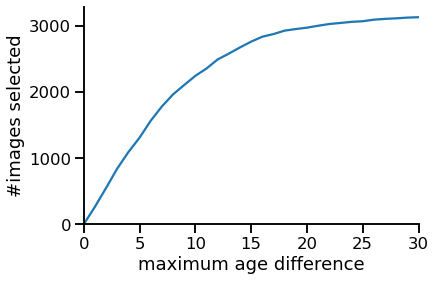

In [135]:
df_wiki = df[df.dataset == 'wiki'].copy()
df_wiki['age_diff'] = abs(df_wiki.age - df_wiki.age_fairface)
x = []
y = []
for max_diff in range(0,31):
    filtered_df = df_wiki[df_wiki.age_diff < max_diff]
    x.append(max_diff)
    y.append(len(filtered_df))

sns.set_context("talk")
ax = sns.lineplot(x=pd.Series(x, name='maximum age difference'), y=pd.Series(y, name='#images selected'))
ax.set(xlim=(0,30), ylim=(0,None))
sns.despine()

In [166]:
df_wiki = df[df.dataset == 'wiki'].copy()
df_wiki['age_diff'] = abs(df_wiki.age - df_wiki.age_fairface)
df_wiki = df_wiki[df_wiki['age_diff'] < 10]
df_wiki = df_wiki[df_wiki.gender == (df_wiki.gender_fairface == 'Male')]
print(f'selected {len(df_wiki)}/{len(df[df.dataset == "wiki"])} Wikipedia images')
df_wiki

selected 2133/2133 Wikipedia images


,age,filename,gender,name,photo taken,dataset,gender_deepface,age_deepface,race_deepface,weighted_age_deepface,...,race_fairface,age_fairface_lower,age_fairface_upper,name_wikidata,IMDB id,gender_wikidata,dob_wikidata,year of image,age_wikidata,age_diff
3990,10,42758275_2004-03-27_2014.jpg,0,Amira Willighagen,2014,wiki,Man,31,white,33.375973,...,White,10,19,NaN,NaN,NaN,NaN,NaN,NaN,4.5
3991,10,2408622_1946-12-04_1956.jpg,0,Sherry Alberoni,1956,wiki,Woman,25,white,26.373426,...,White,3,9,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3992,10,29893257_2002-05-06_2012.jpg,0,Emily Alyn Lind,2012,wiki,Woman,39,white,39.679077,...,White,3,9,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3993,10,2423138_1946-08-01_1956.jpg,0,Karen Pendleton,1956,wiki,Woman,31,white,30.392610,...,White,3,9,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3994,10,395119_2003-12-07_2013.jpg,0,"Catharina-Amalia, Princess of Orange",2013,wiki,Woman,29,white,29.551784,...,White,3,9,NaN,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,70,7312092_1939-09-25_2009.jpg,1,Artur Chilingarov,2009,wiki,Man,60,white,59.939139,...,Middle Eastern,60,69,NaN,NaN,NaN,NaN,NaN,NaN,5.5
6119,70,20127006_1941-08-24_2011.jpg,1,Jürgen Eschert,2011,wiki,Man,44,white,41.223996,...,White,60,69,NaN,NaN,NaN,NaN,NaN,NaN,5.5
6120,70,1393769_1943-09-23_2013.jpg,1,Marty Schottenheimer,2013,wiki,Man,28,white,36.954466,...,White,60,69,NaN,NaN,NaN,NaN,NaN,NaN,5.5
6121,70,23000918_1944-12-14_2014.jpg,1,Fred Watson,2014,wiki,Man,68,white,66.873028,...,White,60,69,NaN,NaN,NaN,NaN,NaN,NaN,5.5


In [285]:
selected_images = df7[df7.age_diff < 10].copy()
# partially overwrite the data with matched data from wikidata
selected_images['gender'] = selected_images.gender_wikidata
selected_images['age'] = selected_images.age_wikidata
selected_images['name'] = selected_images.name_wikidata
df_wiki.loc[df_wiki['gender'] == 0, 'gender'] = 'Female'
df_wiki.loc[df_wiki['gender'] == 1, 'gender'] = 'Male'
selected_images = pd.concat([selected_images, df_wiki]).reset_index(drop=True)

# restore the ids that were originally used for pairwise annotation
orig_ids = pd.read_csv('./data/imdb-wiki/ground_truth_cleaned.csv', index_col=0)
orig_ids['id'] = orig_ids.index
orig_ids
_tmp_df = pd.merge(left=selected_images, left_on='filename', right=orig_ids[['filename', 'id']], right_on='filename')
selected_images.index = list(_tmp_df.id)

selected_images.to_csv('./data/imdb-wiki/ground_truth_selected.csv')
selected_images

,age,filename,gender,name,photo taken,dataset,gender_deepface,age_deepface,race_deepface,weighted_age_deepface,...,race_fairface,age_fairface_lower,age_fairface_upper,name_wikidata,IMDB id,gender_wikidata,dob_wikidata,year of image,age_wikidata,age_diff
8582,8.0,nm0000002_rm1411175936_1924-9-16_1991.jpg,Female,Thora Birch,1991,imdb,Woman,31,asian,31.714540,...,White,3,9,Thora Birch,nm0000301,Female,1982-03-11 00:00:00+00:00,1991-01-01 00:00:00+00:00,8.0,2.0
3337,31.0,nm0000003_rm1514206208_1934-9-28_1966.jpg,Female,Brigitte Bardot,1966,imdb,Woman,38,white,37.898201,...,White,30,39,Brigitte Bardot,nm0000003,Female,1934-09-28 00:00:00+00:00,1966-01-01 00:00:00+00:00,31.0,3.5
9056,15.0,nm0000012_rm2048502272_1908-4-5_1978.jpg,Male,Ike Eisenmann,1978,imdb,Man,31,white,32.025219,...,White,20,29,Ike Eisenmann,nm0252055,Male,1962-07-21 00:00:00+00:00,1978-01-01 00:00:00+00:00,15.0,9.5
4535,68.0,nm0000013_rm3631067136_1922-4-3_1962.jpg,Male,Jimmy Durante,1962,imdb,Man,47,middle eastern,48.532803,...,White,60,69,Jimmy Durante,nm0002051,Male,1893-02-10 00:00:00+00:00,1962-01-01 00:00:00+00:00,68.0,3.5
9148,37.0,nm0000024_rm1715129344_1904-4-14_1974.jpg,Male,Albert Finney,1974,imdb,Woman,44,white,43.594910,...,White,30,39,Albert Finney,nm0001215,Male,1936-05-09 00:00:00+00:00,1974-01-01 00:00:00+00:00,37.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,70.0,7312092_1939-09-25_2009.jpg,Male,Artur Chilingarov,2009,wiki,Man,60,white,59.939139,...,Middle Eastern,60,69,NaN,NaN,NaN,NaN,NaN,NaN,5.5
9132,70.0,20127006_1941-08-24_2011.jpg,Male,Jürgen Eschert,2011,wiki,Man,44,white,41.223996,...,White,60,69,NaN,NaN,NaN,NaN,NaN,NaN,5.5
9137,70.0,1393769_1943-09-23_2013.jpg,Male,Marty Schottenheimer,2013,wiki,Man,28,white,36.954466,...,White,60,69,NaN,NaN,NaN,NaN,NaN,NaN,5.5
9139,70.0,23000918_1944-12-14_2014.jpg,Male,Fred Watson,2014,wiki,Man,68,white,66.873028,...,White,60,69,NaN,NaN,NaN,NaN,NaN,NaN,5.5


## Subsampling

In [175]:
df = pd.read_csv('./data/imdb-wiki/ground_truth_fairface.csv')

In [222]:
def img_to_imdb(img):
    actor = img.split('_')[0]
    file = img.split('_')[1]
    return f'https://www.imdb.com/name/{actor}/mediaviewer/{file}'

In [172]:
datasets_pairwise = pd.merge(left=pairwise_df, left_on='left', right=df['dataset'], right_index=True).rename(columns={'dataset': 'dataset_left'})
datasets_pairwise = pd.merge(left=datasets_pairwise, left_on='right', right=df['dataset'], right_index=True).rename(columns={'dataset': 'dataset_right'})
datasets_pairwise

,left,right,label,performer,dataset_left,dataset_right
0,2229,3164,3164,0,wiki,imdb
176041,4463,3164,3164,2982,imdb,imdb
116100,8178,3164,8178,2015,wiki,imdb
192535,3579,3164,3164,2395,wiki,imdb
164090,1722,3164,3164,2542,wiki,imdb
...,...,...,...,...,...,...
132808,8382,5689,8382,2201,imdb,imdb
93396,5318,5689,5689,1630,imdb,imdb
79612,3874,5689,3874,910,wiki,imdb
196792,5894,5689,5894,3272,imdb,imdb


In [ ]:
pairwise_actors = pairwise_df.copy()
pairwise_actors['left_filename']  = pairwise_actors['left'].apply(lambda x: df[df.index==x].filename.iloc[0])
pairwise_actors['right_filename']  = pairwise_actors['right'].apply(lambda x: df[df.index==x].filename.iloc[0])
pairwise_actors

In [55]:
actors_per_image = actors_df.groupby('filename').count()[['name']].reset_index().rename(columns={'name': 'actors per image'})
single_actor_images = actors_per_image[actors_per_image['actors per image'] == 1]
single_actor_images

,filename,actors per image
1,nm0000002_rm238734336_1924-9-16_1974.jpg,1
2,nm0000002_rm4213815808_1924-9-16_1990.jpg,1
12,nm0000047_rm3937572864_1934-9-20_1998.jpg,1
22,nm0000072_rm2151386624_1932-2-27_1994.jpg,1
23,nm0000072_rm2497944320_1932-2-27_1985.jpg,1
...,...,...
5929,nm5554445_rm1862194688_1999-3-19_2013.jpg,1
5932,nm5617092_rm2985423360_2000-5-16_2015.jpg,1
5934,nm5821197_rm2940008192_1997-6-20_2015.jpg,1
5935,nm5897535_rm4291229440_1999-10-18_2014.jpg,1


In [26]:
pairwise_counted_actors = pd.merge(left=pairwise_actors, left_on='left_filename',
                                   right=actors_per_image.rename(columns={'actors per image': 'actors left'}), right_on='filename')
pairwise_counted_actors = pd.merge(left=pairwise_counted_actors, left_on='right_filename',
                                   right=actors_per_image.rename(columns={'actors per image': 'actors right'}), right_on='filename')
pairwise_counted_actors.drop(columns=['filename_x', 'filename_y'], inplace=True)
pairwise_counted_actors

,left,right,label,performer,left_filename,right_filename,actors left,actors right
0,6505,5302,6505,0,nm0000072_rm2497944320_1932-2-27_1985.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,1,2
1,6984,5302,5302,1235,nm0001418_rm650675712_1954-5-8_2010.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,2,2
2,926,5302,5302,3600,nm0905157_rm3577780992_1989-3-15_2005.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,2,2
3,1814,5302,5302,66,nm1404408_rm2685713408_1982-2-6_2004.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,2,2
4,4165,5302,5302,1884,nm0000138_rm1663676928_1974-11-11_2011.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,3,2
...,...,...,...,...,...,...,...,...
105426,7648,8207,7648,3554,nm0000217_rm2711067392_1942-11-17_2002.jpg,nm0000606_rm2364001280_1948-7-30_2012.jpg,1,2
105427,3519,8207,3519,1930,nm0000656_rm3759181312_1958-8-18_1991.jpg,nm0000606_rm2364001280_1948-7-30_2012.jpg,2,2
105428,6972,8207,8207,285,nm0827565_rm1589166592_1953-7-11_2009.jpg,nm0000606_rm2364001280_1948-7-30_2012.jpg,2,2
105429,809,8207,8207,633,nm0153738_rm2576259840_1990-7-24_2005.jpg,nm0000606_rm2364001280_1948-7-30_2012.jpg,1,2


In [27]:
pairwise_single_actor = pairwise_counted_actors[(pairwise_counted_actors['actors left'] == 1) & (pairwise_counted_actors['actors right'] == 1)]
pairwise_single_actor

,left,right,label,performer,left_filename,right_filename,actors left,actors right
14,6505,3785,6505,82,nm0000072_rm2497944320_1932-2-27_1985.jpg,nm0214299_rm48479232_1976-10-23_2011.jpg,1,1
16,482,3785,3785,705,nm1351987_rm855546624_1993-8-11_2006.jpg,nm0214299_rm48479232_1976-10-23_2011.jpg,1,1
17,6340,3785,6340,1498,nm0000968_rm2616825856_1950-6-8_2002.jpg,nm0214299_rm48479232_1976-10-23_2011.jpg,1,1
18,2612,3785,3785,3874,nm0174819_rm2326903040_1978-6-9_2005.jpg,nm0214299_rm48479232_1976-10-23_2011.jpg,1,1
20,834,3785,3785,1998,nm0004850_rm856395264_1974-9-29_1989.jpg,nm0214299_rm48479232_1976-10-23_2011.jpg,1,1
...,...,...,...,...,...,...,...,...
105411,4734,1133,4734,3321,nm0396908_rm1386384896_1968-7-19_2009.jpg,nm1091701_rm587111168_1990-6-15_2007.jpg,1,1
105412,9013,1133,9013,1697,nm0000603_rm3813120512_1937-1-30_2007.jpg,nm1091701_rm587111168_1990-6-15_2007.jpg,1,1
105414,8105,1133,8105,1008,nm0877913_rm4197488640_1939-11-26_2003.jpg,nm1091701_rm587111168_1990-6-15_2007.jpg,1,1
105420,840,1133,840,1347,nm0088298_rm4217346048_1989-2-21_2004.jpg,nm1091701_rm587111168_1990-6-15_2007.jpg,1,1


In [63]:
img_to_imdb('nm0000072_rm2497944320_1932-2-27_1985.jpg')

'https://www.imdb.com/name/nm0000072/mediaviewer/rm2497944320'

In [29]:
print('pairwise single actor comparisons:', len(pairwise_single_actor))
print('wiki only comparisons:', len(datasets_pairwise[(datasets_pairwise.dataset_left == 'wiki') & (datasets_pairwise.dataset_right == 'wiki')]))
print('imdb only comparisons:', len(datasets_pairwise[(datasets_pairwise.dataset_left == 'imdb') & (datasets_pairwise.dataset_right == 'imdb')]))
print('between datasets comparisons:', len(datasets_pairwise[datasets_pairwise.dataset_left != datasets_pairwise.dataset_right]))

pairwise single actor comparisons: 25184
wiki only comparisons: 30738
imdb only comparisons: 106207
between datasets comparisons: 113304


In [317]:
wiki_only_pairwise = datasets_pairwise[(datasets_pairwise.dataset_left == 'wiki') & (datasets_pairwise.dataset_right == 'wiki')]
wiki_only_pairwise

,left,right,label,performer,dataset_left,dataset_right
107437,2229,6243,6243,1777,wiki,wiki
215680,6288,6243,6288,3568,wiki,wiki
153891,7078,6243,7078,2611,wiki,wiki
193377,1773,6243,6243,3201,wiki,wiki
51767,5511,6243,5511,939,wiki,wiki
...,...,...,...,...,...,...
238163,2482,1339,2482,3524,wiki,wiki
237776,2130,1339,2130,3166,wiki,wiki
209064,2755,1339,2755,3535,wiki,wiki
233964,6395,1339,6395,3855,wiki,wiki


### Basic Statistics

In [124]:
df = pd.read_csv('./data/imdb-wiki/ground_truth_selected.csv', index_col=0) # _stratified
pairwise_df = pd.read_csv('./data/imdb-wiki/comparisons_cleaned.csv')
df[df['dataset'] == 'imdb'].sort_index()

,age,filename,gender,name,photo taken,dataset,gender_deepface,age_deepface,race_deepface,weighted_age_deepface,...,race_fairface,age_fairface_lower,age_fairface_upper,name_wikidata,IMDB id,gender_wikidata,dob_wikidata,year of image,age_wikidata,age_diff
0,9.0,nm1442940_rm3965098752_1996-10-3_2006.jpg,Female,Adair Tishler,2006,imdb,Woman,29,white,27.542897,...,White,3,9,Adair Tishler,nm1442940,Female,1996-10-03 00:00:00+00:00,2006-01-01 00:00:00+00:00,9.0,3.0
1,9.0,nm4832920_rm1781768448_2003-8-28_2013.jpg,Female,Quvenzhané Wallis,2013,imdb,Man,20,black,22.001092,...,Black,3,9,Quvenzhané Wallis,nm4832920,Female,2003-08-28 00:00:00+00:00,2013-01-01 00:00:00+00:00,9.0,3.0
2,9.0,nm0652089_rm860657920_1992-3-10_2002.jpg,Female,Emily Osment,2002,imdb,Man,21,asian,24.205546,...,White,10,19,Emily Osment,nm0652089,Female,1992-03-10 00:00:00+00:00,2002-01-01 00:00:00+00:00,9.0,5.5
3,9.0,nm0004917_rm1493730304_1969-5-12_1979.jpg,Female,Kim Fields,1979,imdb,Woman,36,asian,32.919495,...,Black,3,9,Kim Fields,nm0004917,Female,1969-05-12 00:00:00+00:00,1979-01-01 00:00:00+00:00,9.0,3.0
4,27.0,nm1113550_rm1332711936_1996-4-14_2006.jpg,Female,Ali Hillis,2006,imdb,Woman,31,white,31.132969,...,White,20,29,Ali Hillis,nm0385029,Female,1978-12-29 00:00:00+00:00,2006-01-01 00:00:00+00:00,27.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9122,38.0,nm0000886_rm2862193408_1937-3-30_2007.jpg,Male,Will Smith,2007,imdb,Man,26,black,25.891589,...,Black,30,39,Will Smith,nm0000226,Male,1968-09-25 00:00:00+00:00,2007-01-01 00:00:00+00:00,38.0,3.5
9128,69.0,nm0000257_rm3782056704_1936-1-28_2006.jpg,Male,Alan Alda,2006,imdb,Man,68,white,66.135255,...,White,60,69,Alan Alda,nm0000257,Male,1936-01-28 00:00:00+00:00,2006-01-01 00:00:00+00:00,69.0,4.5
9143,30.0,nm0000362_rm3534668800_1944-11-17_2014.jpg,Female,Lucy DeVito,2014,imdb,Woman,36,white,35.334501,...,White,30,39,Lucy DeVito,nm2192439,Female,1983-03-11 00:00:00+00:00,2014-01-01 00:00:00+00:00,30.0,4.5
9147,47.0,nm0001627_rm4164078592_1927-2-20_1997.jpg,Male,Richard Gere,1997,imdb,Man,43,white,40.944005,...,White,50,59,Richard Gere,nm0000152,Male,1949-08-31 00:00:00+00:00,1997-01-01 00:00:00+00:00,47.0,7.5


In [125]:
counts_left = pairwise_df.groupby(['left'], sort=True).count().reset_index().rename(columns={'left':'id', 'right':'count_left'})[['id','count_left']]
counts_right = pairwise_df.groupby(['right'], sort=True).count().reset_index().rename(columns={'right':'id', 'left':'count_right'})[['id','count_right']]
counts = pd.merge(left=counts_left, right=counts_right, on='id')
counts['total comparisons'] = counts['count_left'] + counts['count_right']
stats = pd.merge(left=counts, right=df[['age', 'gender', 'race_fairface', 'age_fairface']], left_on='id', right_index=True)
stats

,id,count_left,count_right,total comparisons,age,gender,race_fairface,age_fairface
0,0,27,24,51,9.0,Female,White,6.0
1,1,38,26,64,9.0,Female,Black,6.0
2,2,30,21,51,9.0,Female,White,14.5
3,3,33,21,54,9.0,Female,Black,6.0
4,4,25,25,50,27.0,Female,White,24.5
...,...,...,...,...,...,...,...,...
9139,9139,28,34,62,70.0,Male,White,64.5
9140,9140,26,18,44,70.0,Male,White,64.5
9143,9143,27,27,54,30.0,Female,White,34.5
9147,9147,32,37,69,47.0,Male,White,54.5


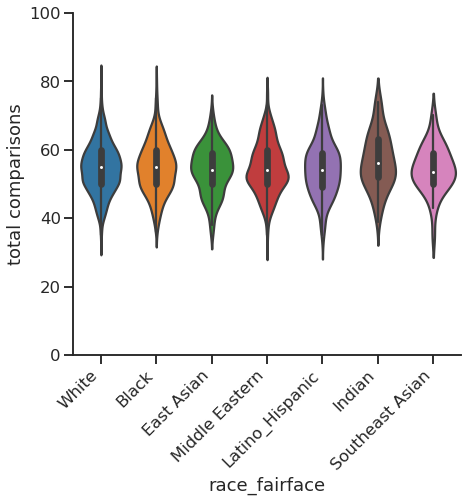

In [294]:
#print(f"individuals of gender 0: {len(stats[stats.gender == 0])}")
#print(f"individuals of gender 1: {len(stats[stats.gender == 1])}")
#print(f"mean # comparisons, gender 0: {stats[stats.gender == 0]['total comparisons'].mean()}")
#print(f"mean # comparisons, gender 1: {stats[stats.gender == 1]['total comparisons'].mean()}")

ax = sns.catplot(stats, y='total comparisons', x='race_fairface', kind='violin', aspect=1.2/1, height=6)
ax.set(ylim=(0,100))
plt.xticks(rotation=45, ha='right')
plt.show()

In [126]:
win_lose = pairwise_df[['left', 'right', 'label']].copy().rename(columns={'label': 'win'})
win_lose.loc[win_lose.left == win_lose.win, 'lose'] = win_lose.right
win_lose.loc[win_lose.right == win_lose.win, 'lose'] = win_lose.left
win_lose['lose'] = win_lose['lose'].astype(int)
win_lose

,left,right,win,lose
0,2229,3164,3164,2229
1,6505,5302,6505,5302
2,2822,2139,2822,2139
3,2757,8593,8593,2757
4,3991,7792,7792,3991
...,...,...,...,...
250244,3209,7,7,3209
250245,8533,7276,8533,7276
250246,5025,228,5025,228
250247,2059,6425,6425,2059


In [ ]:
win_lose_wiki = wiki_only_pairwise[['left', 'right', 'label']].copy().rename(columns={'label': 'win'})
win_lose_wiki.loc[win_lose_wiki.left == win_lose_wiki.win, 'lose'] = win_lose_wiki.right
win_lose_wiki.loc[win_lose_wiki.right == win_lose_wiki.win, 'lose'] = win_lose_wiki.left
win_lose_wiki['lose'] = win_lose_wiki['lose'].astype(int)
win_lose_wiki

In [ ]:
win_lose_single = pairwise_single_actor[['left', 'right', 'label']].copy().rename(columns={'label': 'win'})
win_lose_single.loc[win_lose_single.left == win_lose_single.win, 'lose'] = win_lose_single.right
win_lose_single.loc[win_lose_single.right == win_lose_single.win, 'lose'] = win_lose_single.left
win_lose_single['lose'] = win_lose_single['lose'].astype(int)
win_lose_single

In [127]:
counts_win = win_lose.groupby(['win'], sort=True).count().reset_index().rename(columns={'win':'id', 'lose':'number of wins'})[['id','number of wins']]
counts_lose = win_lose.groupby(['lose'], sort=True).count().reset_index().rename(columns={'lose':'id', 'win':'number of losses'})[['id','number of losses']]
counts_win_lose = pd.merge(left=counts_win, right=counts_lose, on='id', how='outer')
#counts['total comparisons'] = counts['count_left'] + counts['count_right']
stats_win_lose = pd.merge(left=counts_win_lose, right=df[['age','gender', 'race_fairface', 'gender_fairface', 'age_fairface', 'dataset']], left_on='id', right_index=True)
#stats_win_lose['gender'] = stats_win_lose['gender'].replace({0: 'female', 1: 'male'})
stats_win_lose['winning ratio'] = stats_win_lose['number of wins'] / (stats_win_lose['number of wins'] + stats_win_lose['number of losses'])
stats_win_lose.loc[(stats_win_lose['number of wins'].notna()) & (stats_win_lose['number of losses'].notna() == False), 'winning ratio'] = 1
stats_win_lose.loc[(stats_win_lose['number of losses'].notna()) & (stats_win_lose['number of wins'].notna() == False), 'winning ratio'] = 0
stats_win_lose

,id,number of wins,number of losses,age,gender,race_fairface,gender_fairface,age_fairface,dataset,winning ratio
0,0,1.0,50.0,9.0,Female,White,Female,6.0,imdb,0.019608
1,1,5.0,59.0,9.0,Female,Black,Female,6.0,imdb,0.078125
2,2,2.0,49.0,9.0,Female,White,Female,14.5,imdb,0.039216
3,3,3.0,51.0,9.0,Female,Black,Female,6.0,imdb,0.055556
4,4,22.0,28.0,27.0,Female,White,Female,24.5,imdb,0.440000
...,...,...,...,...,...,...,...,...,...,...
9143,726,NaN,49.0,13.0,Male,White,Male,6.0,imdb,0.000000
9144,728,NaN,71.0,13.0,Male,White,Male,14.5,imdb,0.000000
9145,794,NaN,47.0,14.0,Female,White,Female,14.5,imdb,0.000000
9146,879,NaN,46.0,14.0,Male,Middle Eastern,Male,14.5,imdb,0.000000


In [ ]:
wiki_counts_win = win_lose_wiki.groupby(['win'], sort=True).count().reset_index().rename(columns={'win':'id', 'lose':'number of wins'})[['id','number of wins']]
wiki_counts_lose = win_lose_wiki.groupby(['lose'], sort=True).count().reset_index().rename(columns={'lose':'id', 'win':'number of losses'})[['id','number of losses']]
wiki_counts_win_lose = pd.merge(left=wiki_counts_win, right=wiki_counts_lose, on='id')
#counts['total comparisons'] = counts['count_left'] + counts['count_right']
wiki_stats_win_lose = pd.merge(left=wiki_counts_win_lose, right=df[['age','gender', 'race_fairface', 'gender_fairface', 'age_fairface', 'dataset']], left_on='id', right_index=True)
wiki_stats_win_lose['gender'] = wiki_stats_win_lose['gender'].replace({0: 'female', 1: 'male'})
wiki_stats_win_lose['winning ratio'] = wiki_stats_win_lose['number of wins'] / (wiki_stats_win_lose['number of wins'] + wiki_stats_win_lose['number of losses'])
wiki_stats_win_lose

In [ ]:
single_counts_win = win_lose_single.groupby(['win'], sort=True).count().reset_index().rename(columns={'win':'id', 'lose':'number of wins'})[['id','number of wins']]
single_counts_lose = win_lose_single.groupby(['lose'], sort=True).count().reset_index().rename(columns={'lose':'id', 'win':'number of losses'})[['id','number of losses']]
single_counts_win_lose = pd.merge(left=single_counts_win, right=single_counts_lose, on='id')
#counts['total comparisons'] = counts['count_left'] + counts['count_right']
single_stats_win_lose = pd.merge(left=single_counts_win_lose, right=df[['age','gender', 'race_deepface', 'gender_deepface', 'age_deepface', 'weighted_age_deepface', 'dataset']], left_on='id', right_index=True)
single_stats_win_lose['gender'] = single_stats_win_lose['gender'].replace({0: 'female', 1: 'male'})
single_stats_win_lose['winning ratio'] = single_stats_win_lose['number of wins'] / (single_stats_win_lose['number of wins'] + single_stats_win_lose['number of losses'])
single_stats_win_lose

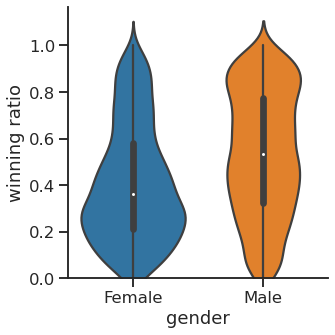

In [128]:
sns.set_context("talk") # larger font size
sns.set_style('ticks')


ax = sns.catplot(stats_win_lose.sort_values(by='gender'), y='winning ratio', x='gender', kind='violin', aspect=1/1)
ax.set(ylim=(0,None))
#plt.xticks(rotation=45, ha='right')
plt.show()

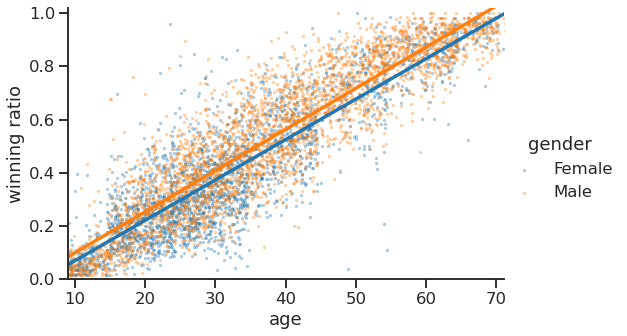

In [129]:
sns.set_context("talk")

ax = sns.lmplot(stats_win_lose.sort_values(by='gender'), x='age', y='winning ratio', hue='gender',
                aspect=1.5/1, ci=None, scatter_kws={"s": 5, 'alpha': 0.3}, x_jitter=0.5, y_jitter=0)
ax.set(xlim=(9,71), ylim=(0,1.02))
sns.despine()

In [107]:
# Correlations
from scipy.stats import pearsonr

print('stratified dataset', pearsonr(stats_win_lose.age, stats_win_lose['winning ratio']))
print('stratified dataset, detected age', pearsonr(stats_win_lose.age_fairface, stats_win_lose['winning ratio']))
#print('filtered dataset, wiki only', pearsonr(wiki_stats_win_lose.age, wiki_stats_win_lose['winning ratio']))
#print('single actors imdb', pearsonr(single_stats_win_lose.age, single_stats_win_lose['winning ratio']))

stratified dataset (0.9217232335334863, 0.0)
stratified dataset, detected age (0.9209501439014721, 0.0)


In [47]:
from statsmodels.formula.api import ols

x = single_stats_win_lose['age']
y = single_stats_win_lose['number of wins']
regression = ols("data ~ x", data=dict(data=y, x=x)).fit()
test = regression.outlier_test()

In [48]:
test

,student_resid,unadj_p,bonf(p)
0,-0.387114,0.698702,1.0
1,-0.109492,0.912821,1.0
2,0.723413,0.469488,1.0
3,0.723413,0.469488,1.0
4,1.278950,0.201023,1.0
...,...,...,...
2730,-1.200495,0.230051,1.0
2731,-3.149277,0.001654,1.0
2732,0.187964,0.850919,1.0
2733,-0.089666,0.928559,1.0


In [50]:
outliers = test[test['unadj_p'] < 0.01].index
outliers

Int64Index([  98,  123,  273,  441,  543,  807,  849, 1021, 1085, 1145, 1197,
            1258, 1310, 1430, 1496, 1539, 1657, 1664, 1691, 1699, 1778, 1821,
            1854, 1869, 1980, 2005, 2046, 2066, 2077, 2079, 2142, 2195, 2282,
            2341, 2408, 2415, 2416, 2417, 2421, 2455, 2459, 2479, 2559, 2585,
            2590, 2602, 2622, 2665, 2689, 2699, 2724, 2726, 2731],
           dtype='int64')

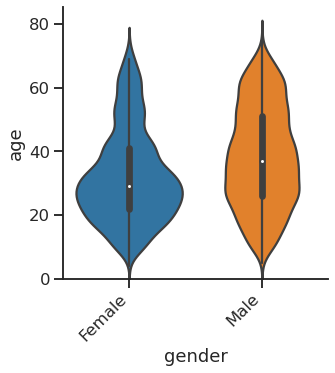

In [130]:
ax = sns.catplot(df, y='age', x='gender', kind='violin', aspect=1/1)
ax.set(ylim=(0,None))
plt.xticks(rotation=45, ha='right')
plt.show()

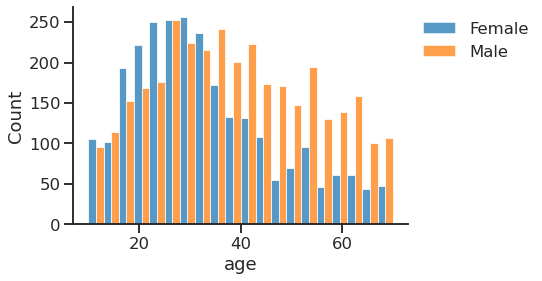

In [131]:
ax = sns.histplot(df, x='age', hue='gender', multiple='dodge', binwidth=3, binrange=(10,70))
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title=None)

In [121]:
list(range(10,75,5))

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

In [132]:
df_bins = df.copy()
bins = list(range(10,74,3))
df_bins['age bin'] = np.array(bins)[np.digitize(df['age'], bins=bins) - 1]
df_bins = df_bins[(df_bins.age >= 10) & (df_bins.age < 70)]
df_bins.groupby(['age bin','gender']).count()[['name']].sort_values('name').head(10)
#df_bins

,,name
age bin,gender,
67,Female,39
64,Female,44
55,Female,46
46,Female,55
61,Female,61
58,Female,61
49,Female,70
67,Male,87
10,Male,96


In [133]:
df_stratified = df_bins.groupby(['age bin', 'gender']).apply(lambda x: x.sample(n=39))
df_stratified = df_stratified.droplevel(level=[0,1])
df_stratified

,age,filename,gender,name,photo taken,dataset,gender_deepface,age_deepface,race_deepface,weighted_age_deepface,...,age_fairface_lower,age_fairface_upper,name_wikidata,IMDB id,gender_wikidata,dob_wikidata,year of image,age_wikidata,age_diff,age bin
330,11.0,nm0198970_rm2038340352_1990-2-13_2002.jpg,Female,Sarah Dampf,2002,imdb,Woman,21,white,20.090917,...,10,19,Sarah Dampf,nm0198970,Female,1990-02-13 00:00:00+00:00,2002-01-01 00:00:00+00:00,11.0,3.5,10
999,12.0,nm2869309_rm964460544_1995-0-0_2010.jpg,Female,Rosie Taylor-Ritson,2010,imdb,Woman,32,white,32.431575,...,10,19,Rosie Taylor-Ritson,nm2890526,Female,1997-02-18 00:00:00+00:00,2010-01-01 00:00:00+00:00,12.0,2.5,10
359,11.0,nm0691600_rm4103715328_1988-12-16_2000.jpg,Female,Anna Popplewell,2000,imdb,Woman,21,white,22.906389,...,10,19,Anna Popplewell,nm0691600,Female,1988-12-16 00:00:00+00:00,2000-01-01 00:00:00+00:00,11.0,3.5,10
199,10.0,nm1534694_rm2703661056_1996-4-25_2007.jpg,Female,Allisyn Snyder,2007,imdb,Man,26,white,26.522329,...,10,19,Allisyn Snyder,nm1534694,Female,1996-04-25 00:00:00+00:00,2007-01-01 00:00:00+00:00,10.0,4.5,10
184,10.0,nm1082270_rm3416561920_1992-0-0_2002.jpg,Female,Tianna Sansbury,2002,imdb,Man,29,black,29.768434,...,3,9,Tianna Sansbury,nm1082270,Female,1992-01-01 00:00:00+00:00,2002-01-01 00:00:00+00:00,10.0,4.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8820,68.0,1604604_1935-09-25_2003.jpg,Male,Adrien Douady,2003,wiki,Man,57,latino hispanic,52.362429,...,60,69,NaN,NaN,NaN,NaN,NaN,NaN,3.5,67
8824,68.0,466093_1944-02-28_2012.jpg,Male,Sepp Maier,2012,wiki,Man,33,white,34.152414,...,60,69,NaN,NaN,NaN,NaN,NaN,NaN,3.5,67
8648,67.0,252869_1946-08-30_2013.jpg,Male,Jacques Tardi,2013,wiki,Man,44,white,44.793291,...,60,69,NaN,NaN,NaN,NaN,NaN,NaN,2.5,67
8985,69.0,187308_1944-02-16_2013.jpg,Male,Richard Ford,2013,wiki,Man,29,white,30.954655,...,60,69,NaN,NaN,NaN,NaN,NaN,NaN,4.5,67


In [96]:
df_stratified.to_csv('./data/imdb-wiki/ground_truth_selected_stratified.csv')

In [134]:
print('filtered:')
print(len(df), 'total pictures')
print(len(df[df.gender == 'Male']), 'men')
print(len(df[df.gender == 'Female']), 'women')

print()
print('stratified:')
print(len(df_stratified), 'total pictures')
print(len(df_stratified[df_stratified.gender == 'Male']), 'men')
print(len(df_stratified[df_stratified.gender == 'Female']), 'women')

filtered:
6123 total pictures
3430 men
2693 women

stratified:
1560 total pictures
780 men
780 women


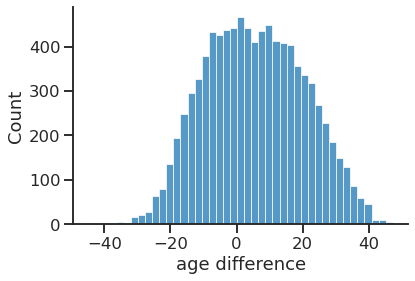

In [246]:
df['age difference'] = df.age - df.weighted_age_deepface
sns.histplot(df, x='age difference')
sns.despine()

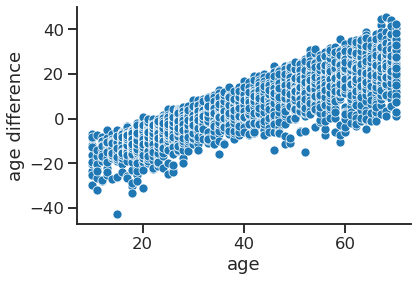

In [145]:
sns.scatterplot(df[df.dataset == 'wiki'], y='age difference', x='age')
sns.despine()

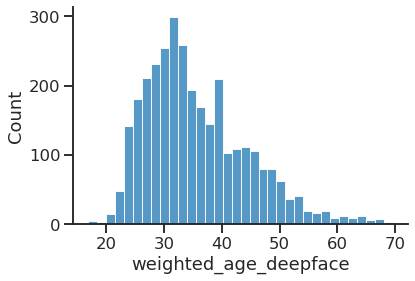

In [141]:
sns.histplot(df[df.dataset == 'wiki'], x='weighted_age_deepface')
sns.despine()

In [67]:
win_lose_perf = pairwise_df.copy().rename(columns={'label': 'win'})
win_lose_perf.loc[win_lose_perf.left == win_lose_perf.win, 'lose'] = win_lose_perf.right
win_lose_perf.loc[win_lose_perf.right == win_lose_perf.win, 'lose'] = win_lose_perf.left
win_lose_perf['lose'] = win_lose_perf['lose'].astype(int)
win_lose_perf

,left,right,win,performer,lose
0,2229,3164,3164,0,2229
1,6505,5302,6505,0,5302
2,2822,2139,2822,0,2139
3,2757,8593,8593,1,2757
4,3991,7792,7792,1,3991
...,...,...,...,...,...
250244,3209,7,7,3885,3209
250245,8533,7276,8533,3885,7276
250246,5025,228,5025,4090,228
250247,2059,6425,6425,4090,2059


## Create a DiGraph to Subsample from

In [10]:
import networkx as nx

pairwise_df = pd.read_csv('./data/imdb-wiki/comparisons_cleaned.csv')
df = pd.read_csv('./data/imdb-wiki/ground_truth_selected.csv', index_col=0)

win_lose = pairwise_df[['left', 'right', 'label']].copy().rename(columns={'label': 'win'})
win_lose.loc[win_lose.left == win_lose.win, 'lose'] = win_lose.right
win_lose.loc[win_lose.right == win_lose.win, 'lose'] = win_lose.left
win_lose['lose'] = win_lose['lose'].astype(int)

G = nx.from_pandas_edgelist(win_lose, source='lose', target='win', create_using=nx.DiGraph)
G2 = G.subgraph(nodes=df.index).copy()  # a smaller graph with only the images we're fairly certain about

print(f'full comparison graph: {G.number_of_nodes()} nodes {G.number_of_edges()} edges')
print(f'filtered comparison graph: {G2.number_of_nodes()} nodes {G2.number_of_edges()} edges')


full comparison graph: 9150 nodes 250249 edges
filtered comparison graph: 6123 nodes 112044 edges


In [16]:
len(list(nx.weakly_connected_components(G2)))

1

In [21]:
tmp_df = df[['age', 'gender']].rename(columns={'age': 'skill'})
tmp_df['minority'] = tmp_df['gender'] == 'Female'

nx.set_node_attributes(G2, tmp_df[['skill', 'minority']].to_dict(orient='index'))

In [23]:
G2.nodes(data='skill')

NodeDataView({2229: 24.0, 3164: 37.0, 6505: 52.0, 2139: 24.0, 2822: 27.0, 2757: 28.0, 7792: 52.0, 1674: 20.0, 4317: 37.0, 5667: 46.0, 6040: 29.0, 4541: 39.0, 5192: 44.0, 1299: 17.0, 5052: 43.0, 2769: 27.0, 8858: 69.0, 3702: 21.0, 2530: 26.0, 3295: 31.0, 2124: 23.0, 4616: 40.0, 1207: 16.0, 2238: 24.0, 2005: 22.0, 1161: 17.0, 558: 17.0, 1886: 22.0, 3595: 33.0, 4970: 43.0, 2322: 25.0, 7004: 56.0, 4313: 23.0, 6044: 48.0, 5647: 47.0, 3469: 32.0, 8639: 66.0, 3996: 36.0, 2100: 42.0, 313: 43.0, 4378: 38.0, 2716: 27.0, 3025: 29.0, 282: 10.0, 2580: 26.0, 477: 24.0, 6580: 53.0, 1851: 21.0, 6695: 54.0, 1226: 17.0, 5294: 21.0, 7495: 59.0, 3662: 33.0, 3327: 31.0, 7248: 57.0, 4059: 37.0, 5829: 48.0, 2276: 24.0, 5286: 53.0, 3179: 30.0, 5950: 27.0, 5945: 48.0, 2469: 26.0, 2918: 28.0, 3975: 42.0, 1514: 24.0, 2482: 26.0, 4444: 38.0, 3082: 30.0, 7766: 60.0, 6440: 52.0, 1578: 20.0, 3900: 35.0, 8609: 32.0, 2206: 22.0, 8073: 62.0, 3764: 34.0, 943: 16.0, 7610: 60.0, 358: 11.0, 4983: 42.0, 6905: 26.0, 3630: 34

## Testing the Subsampling

In [52]:
random_nodes = df.sample(int(len(df)*0.2), random_state=42)['gender'].index
print(f'selected {len(random_nodes)} nodes')
H = G2.subgraph(random_nodes)
nx.is_weakly_connected(H)

selected 1224 nodes


False

In [42]:
random_nodes_0 = df[df.gender == 'Female'].sample(int(len(df)*0.2*0.75), random_state=42)['gender'].index
random_nodes_1 = df[df.gender == 'Male'].sample(int(len(df)*0.2*0.25), random_state=42)['gender'].index
print(f'selected {len(random_nodes_0)} nodes of gender female')
print(f'selected {len(random_nodes_1)} nodes of gender male')
H = G.subgraph(list(random_nodes_0) + list(random_nodes_1))
nx.is_weakly_connected(H)

selected 918 nodes of gender female
selected 306 nodes of gender male


True

In [ ]:
rng = np.random.default_rng(seed=42)
random_edges = rng.choice(H.edges, size=len(H)//2, axis=0)  # crucially, we ignore edges that have already been re-added (i.e., we don't exclude them from the sample)

In [ ]:
I = nx.DiGraph()
I.add_nodes_from(G.nodes(data=True))

In [ ]:
I.add_edges_from(list(map(tuple, random_edges)))
nx.is_weakly_connected(I)

False

## Subsample and Recover a Ranking

In [10]:
from fairpair import *

In [44]:
FPG = FairPairGraph()
FPG.add_nodes_from(G2.nodes(data=True))

### Random Subsampling

In [46]:
# weak connectivity

rng = np.random.default_rng()
FPG_test = FPG.copy()

for i in range(100):
    # sample 10 times before evaluating again
    for j in range(10):
        random_nodes = df.sample(int(len(df)*0.2))['gender'].index
        H = G2.subgraph(random_nodes)
        random_edges = rng.choice(H.edges, size=len(H)//2, axis=0)
        FPG_test.add_edges_from(list(map(tuple, random_edges)))
    print(f"iteration {(i+1)*(j+1)}: {'not ' if not nx.is_weakly_connected(FPG_test) else ''}weakly connected")
    if nx.is_weakly_connected(FPG_test): break

iteration 10: not weakly connected
iteration 20: not weakly connected
iteration 30: not weakly connected
iteration 40: not weakly connected
iteration 50: not weakly connected
iteration 60: not weakly connected
iteration 70: weakly connected


In [ ]:
# testing the random subsampling on a single run

rng = np.random.default_rng()
FPG_rand = FPG.copy()
connected = False
results = []
ranker = RankRecovery(FPG_rand)
trial = 0

base_scores = {node: score for node, score in FPG.nodes(data='skill')}
minority_nodes = list(FPG_rand.minority.nodes)
majority_nodes = list(FPG_rand.majority.nodes)

for i in range(100):
    # sample 10 times before evaluating again
    for j in range(10):
        random_nodes = df.sample(int(len(df)*0.2))['gender'].index
        H = G2.subgraph(random_nodes)
        random_edges = rng.choice(H.edges, size=len(H)//2, axis=0)
        FPG_rand.add_edges_from(list(map(tuple, random_edges)))
    
    ranking, other_nodes = ranker.apply()
    
    if nx.is_weakly_connected(FPG_rand):
        if not connected:
            print(f'Weakly connected after {(i+1)*10} iterations.')
            connected = True
        tau = weighted_tau_nodes(base_scores, ranking, subgraph_nodes=majority_nodes, complementary_nodes=minority_nodes)
        results.append((trial, i*10, tau, 'tau', 'Privileged'))
        tau = weighted_tau_nodes(base_scores, ranking, subgraph_nodes=minority_nodes, complementary_nodes=majority_nodes)
        results.append((trial, i*10, tau, 'tau', 'Unprivileged'))
        exp = exposure_nodes(ranking, subgraph_nodes=majority_nodes)
        results.append((trial, i*10, exp, 'exposure', 'Privileged'))
        exp = exposure_nodes(ranking, subgraph_nodes=minority_nodes)
        results.append((trial, i*10, exp, 'exposure', 'Unprivileged'))
        #tau = weighted_tau_separate(FPG_rand, ranking, FPG_rand.majority)
        #accuracy.append((trial, i*10, tau[0], 'Privileged within-group'))
        #accuracy.append((trial, i*10, tau[1], 'Between groups'))
        #tau = weighted_tau_separate(FPG_rand, ranking, FPG_rand.minority, calc_between=False)
        #accuracy.append((trial, i*10, tau[0], 'Unprivileged within-group'))
        
        print(f'Evaluated {(i+1)*10} iterations.')

In [48]:
results_df = pd.DataFrame(results, columns=['trial', 'iteration', 'value', 'metric', 'group'])
results_df

,trial,iteration,value,metric,group
0,0,70,0.210914,tau,Privileged
1,0,70,0.215017,tau,Unprivileged
2,0,70,0.094699,exposure,Privileged
3,0,70,0.089019,exposure,Unprivileged
4,0,80,0.206289,tau,Privileged
...,...,...,...,...,...
167,0,480,0.088727,exposure,Unprivileged
168,0,490,0.156284,tau,Privileged
169,0,490,0.162838,tau,Unprivileged
170,0,490,0.094920,exposure,Privileged


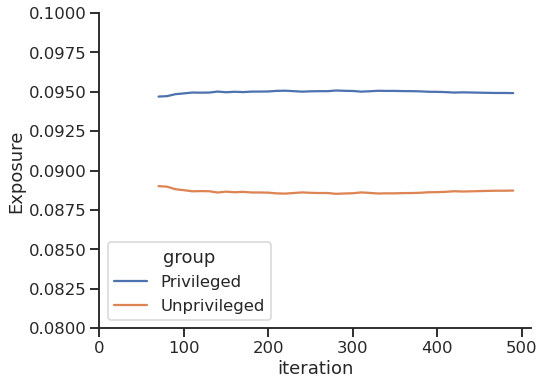

In [51]:
sns.set(rc={'figure.figsize':(4/3*5.8,5.8)})
sns.set_context("talk") # larger font size
sns.set_style('ticks')

tmp_df = results_df[results_df.metric == 'exposure'].copy()
tmp_df['Exposure'] = tmp_df['value']
ax = sns.lineplot(tmp_df, x='iteration', y='Exposure', hue='group', hue_order=['Privileged', 'Unprivileged'])
ax.set(ylim=(0.08,0.1), xlim=(0,None))
sns.despine()

In [ ]:
print('Orginal graph:', G2.number_of_edges(), 'edges')
print('Subsampled graph after xxx iterations:', FPG_rand.number_of_edges(), 'edges')
print('ratio:', FPG_rand.number_of_edges()/G2.number_of_edges()*100, '%')

Orginal graph: 250249 edges
Subsampled graph after 500 iterations: 208628 edges
ratio: 83.36816530735388 %


## Evaluation

In [2]:
#results_df = pd.read_csv('./data/imdb-wiki_results/test_rankCentrality_correlations_8trials.csv')
results_df = pd.read_csv('./data/imdb-wiki_results/basicMethods_correlations_10trials.csv')
results_df

,trial,iteration,skill score,rank,group,sampling method,ranker
0,0,80,24.0,1632,Privileged,randomSampling,randomRankRecovery
1,0,80,37.0,2786,Privileged,randomSampling,randomRankRecovery
2,0,80,27.0,789,Privileged,randomSampling,randomRankRecovery
3,0,80,52.0,541,Privileged,randomSampling,randomRankRecovery
4,0,80,37.0,1480,Privileged,randomSampling,randomRankRecovery
...,...,...,...,...,...,...,...
49400359,9,1000,28.0,2192,Unprivileged,rankSampling,rankCentrality
49400360,9,1000,38.0,3408,Unprivileged,rankSampling,rankCentrality
49400361,9,1000,49.0,5622,Unprivileged,rankSampling,rankCentrality
49400362,9,1000,25.0,788,Unprivileged,rankSampling,rankCentrality


In [5]:
ranking_method = 'rankCentrality'; trial=1; sampling_method = 'rankSampling'

filtered_df = results_df[results_df['ranker'] == ranking_method].copy()
filtered_df = filtered_df[filtered_df['trial'] == trial] 
filtered_df = filtered_df[filtered_df['sampling method'] == sampling_method] 
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,trial,iteration,skill score,rank,group,sampling method,ranker
0,1,70,24.0,4445,Privileged,rankSampling,rankCentrality
1,1,70,37.0,245,Privileged,rankSampling,rankCentrality
2,1,70,27.0,3929,Privileged,rankSampling,rankCentrality
3,1,70,52.0,732,Privileged,rankSampling,rankCentrality
4,1,70,37.0,5477,Privileged,rankSampling,rankCentrality
...,...,...,...,...,...,...,...
575557,1,1000,28.0,1418,Unprivileged,rankSampling,rankCentrality
575558,1,1000,38.0,2554,Unprivileged,rankSampling,rankCentrality
575559,1,1000,49.0,210,Unprivileged,rankSampling,rankCentrality
575560,1,1000,25.0,4351,Unprivileged,rankSampling,rankCentrality


In [6]:
iteration = filtered_df.iteration.unique()[1]

base_scores = filtered_df[(filtered_df.iteration == iteration)].reset_index(drop=True)['skill score'].to_dict()
majority_nodes = list(filtered_df[(filtered_df.iteration == iteration) & (filtered_df.group == 'Privileged')].reset_index(drop=True).index)
minority_nodes = list(filtered_df[(filtered_df.iteration == iteration) & (filtered_df.group == 'Unprivileged')].reset_index(drop=True).index)
ranking = filtered_df[filtered_df.iteration == iteration].reset_index(drop=True)['rank'].to_dict()

ranking

{0: 4445,
 1: 245,
 2: 3932,
 3: 732,
 4: 5477,
 5: 1037,
 6: 1572,
 7: 5038,
 8: 2321,
 9: 3281,
 10: 3455,
 11: 3505,
 12: 2450,
 13: 4734,
 14: 5640,
 15: 5270,
 16: 5674,
 17: 4125,
 18: 756,
 19: 1349,
 20: 1178,
 21: 256,
 22: 2821,
 23: 1260,
 24: 5392,
 25: 3538,
 26: 1163,
 27: 5005,
 28: 1157,
 29: 4229,
 30: 1374,
 31: 1058,
 32: 1084,
 33: 777,
 34: 5791,
 35: 4698,
 36: 1591,
 37: 572,
 38: 1685,
 39: 3271,
 40: 1336,
 41: 488,
 42: 3651,
 43: 5994,
 44: 1973,
 45: 2253,
 46: 2715,
 47: 1860,
 48: 4647,
 49: 708,
 50: 729,
 51: 4622,
 52: 5322,
 53: 2703,
 54: 5685,
 55: 1254,
 56: 1244,
 57: 4867,
 58: 5542,
 59: 2246,
 60: 1082,
 61: 326,
 62: 1188,
 63: 989,
 64: 1440,
 65: 1822,
 66: 1954,
 67: 1398,
 68: 3789,
 69: 2326,
 70: 402,
 71: 1518,
 72: 1845,
 73: 4205,
 74: 3520,
 75: 1671,
 76: 3794,
 77: 316,
 78: 3977,
 79: 68,
 80: 1200,
 81: 1786,
 82: 1754,
 83: 6036,
 84: 3384,
 85: 5710,
 86: 3061,
 87: 1384,
 88: 3782,
 89: 4858,
 90: 1316,
 91: 3011,
 92: 529,
 93

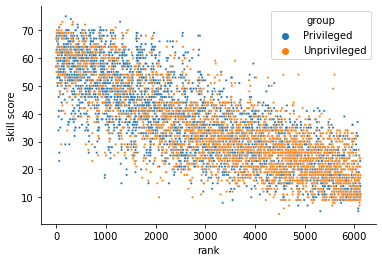

In [8]:
sns.scatterplot(filtered_df[(filtered_df.iteration == 70)], x='rank', y='skill score', s=5, hue='group')
sns.despine()

In [11]:
print('Unprivileged:', weighted_tau_nodes(base_scores, scores_to_rank(ranking, invert=True), subgraph_nodes=minority_nodes, complementary_nodes=majority_nodes))
print('Privileged:', weighted_tau_nodes(base_scores, scores_to_rank(ranking, invert=True), subgraph_nodes=majority_nodes, complementary_nodes=minority_nodes))

Unprivileged: 0.23063756634785196
Privileged: 0.23012690348820605


## Plot Results

In [149]:
evaluated_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_basicMethods_stratified_evaluated.csv')
#gnn_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_GNNRank_reTrained_syncRank_evaluated.csv')
#evaluated_df = pd.concat([evaluated_df, gnn_df])
evaluated_df

,trial,iteration,value,sampling strategy,recovery method,metric,group
0,0,130,0.220159,randomSampling,rankCentrality,tau,Overall
1,0,130,0.216383,randomSampling,rankCentrality,tau,Privileged
2,0,130,0.223992,randomSampling,rankCentrality,tau,Unprivileged
3,0,130,0.115410,randomSampling,rankCentrality,exposure,Privileged
4,0,130,0.112045,randomSampling,rankCentrality,exposure,Unprivileged
...,...,...,...,...,...,...,...
82187,9,1000,0.113929,rankSampling,fairPageRank,exposure,Privileged
82188,9,1000,0.113525,rankSampling,fairPageRank,exposure,Unprivileged
82189,9,1000,0.287844,rankSampling,fairPageRank,tau,Privileged within-group
82190,9,1000,0.296546,rankSampling,fairPageRank,tau,Between groups


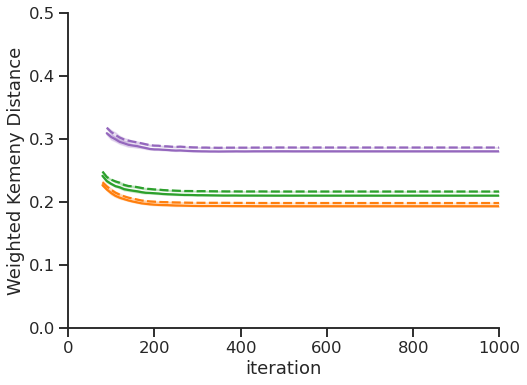

In [150]:
# some settings for seaborn
palette = sns.color_palette('tab10')
palette[0] = palette[7]
sns.set(rc={'figure.figsize':(4/3*5.8,5.8)})
sns.set_context("talk") # larger font size
sns.set_style('ticks')

# select which metric to plot – tau or exposure
df = evaluated_df.loc[evaluated_df.metric == 'tau'].copy()
# further selections
df = df[df['sampling strategy'] == 'randomSampling']
#df = df[df['recovery method'] == "Fairness-Aware PageRank"]
#df = df[df['bias_applied']]

# rename the value to the name of the metric
df['Weighted Kemeny Distance'] = df.value
#df['Exposure'] = df.value

# rename some columns and values
df = df.rename(columns={'recovery method': 'Ranking Method', 'group': 'Group'})
df = df.replace({'davidScore': "David's Score", 'randomRankRecovery': 'Random Rank Recovery', 'rankCentrality': 'Rank Centrality', 'fairPageRank': 'Fairness-Aware PageRank'})

with sns.color_palette(palette):
    ax = sns.lineplot(df, x='iteration', y='Weighted Kemeny Distance', style='Group', hue='Ranking Method',
                      style_order=['Privileged', 'Unprivileged'],
                      hue_order=['Random Rank Recovery', "David's Score", 'Rank Centrality', 'GNNRank', 'Fairness-Aware PageRank']) # select which groups to plot

ax.get_legend().remove()
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title=None)
ax.set(xlim=(0,1000), ylim=(0,0.5))
#ax.set(xlim=(0,1000), ylim=(0.08,0.1))
sns.despine()